# Load SH insolation
Ref: Laskar et al., 2004

In [ ]:
# read the insolation data '65N_inso_mean90_-1Ma_0_inter100.txt'
import pandas as pd
path='D:/VScode/Last_deglaciation/data/inso60S_1Ma_0_inter100_meanlongitude_270.txt'
inso60s=pd.read_csv(path, sep='\s+', header=None)
# rename columns
inso60s.columns=['age', 'insolation']
# age*-1000
inso60s['age']=-1*inso60s['age']*1000
# filp the dataframe
inso60s=inso60s.iloc[::-1]
# convert inso60s to csv
# save the data to csv under /data_fig3
inso60s.to_csv('D:/VScode/Last_deglaciation/data_fig3/inso60s.csv', index=False)

inso60s

,age,insolation
0,-0.0,511.037082
1,100.0,511.404930
2,200.0,511.758942
3,300.0,512.098589
4,400.0,512.423324
...,...,...
9996,999600.0,464.574426
9997,999700.0,464.304934
9998,999800.0,464.063080
9999,999900.0,463.848860


# Load intergrated summer insolation data
Ref: Huybers et al., 2006

In [ ]:
path='D:/VScode/Last_deglaciation/data_fig3/'

# read Huybers P &Denton-2008-NGeo-65S.txt
import pandas as pd
# df_inter_ann = pd.read_csv(path + 'Huybers_Denton_2008_NGeo_65S.txt', sep='\s+', header=0,skiprows=8)
df_inter_ann = pd.read_csv(path + 'j_60south.txt', sep='\s+', header=0,skiprows=8)
# rename column NaN to age
df_inter_ann.rename(columns={'NaN':'age'}, inplace=True)
# age culumn to ka
df_inter_ann['age']=df_inter_ann['age']*1000
# save the data to csv under /data_fig3
df_inter_ann.to_csv(path+'df_inter_ann.csv', index=False)

df_inter_ann


,age,0,25,50,75,100,125,150,175,200,...,375,400,425,450,475,500,525,550,575,600
0,0,7.439,7.394,7.236,7.096,6.946,6.785,6.610,6.418,6.214,...,4.222,3.817,3.360,2.827,2.167,1.184,0.0,0.0,0.0,0.0
1,1000,7.446,7.396,7.244,7.105,6.957,6.796,6.622,6.433,6.229,...,4.252,3.854,3.404,2.879,2.231,1.311,0.0,0.0,0.0,0.0
2,2000,7.454,7.400,7.253,7.116,6.969,6.809,6.636,6.446,6.244,...,4.273,3.871,3.425,2.903,2.264,1.352,0.0,0.0,0.0,0.0
3,3000,7.461,7.404,7.261,7.126,6.981,6.822,6.648,6.462,6.256,...,4.278,3.879,3.427,2.901,2.253,1.325,0.0,0.0,0.0,0.0
4,4000,7.468,7.410,7.271,7.137,6.993,6.834,6.661,6.475,6.271,...,4.274,3.872,3.409,2.872,2.204,1.259,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,4996000,7.395,7.395,7.190,7.039,6.881,6.712,6.529,6.332,6.120,...,4.067,3.652,3.174,2.611,1.874,0.542,0.0,0.0,0.0,0.0
4997,4997000,7.392,7.392,7.184,7.032,6.872,6.703,6.520,6.323,6.113,...,4.088,3.676,3.212,2.664,1.968,0.823,0.0,0.0,0.0,0.0
4998,4998000,7.389,7.389,7.180,7.027,6.867,6.697,6.515,6.318,6.108,...,4.099,3.693,3.237,2.700,2.020,0.956,0.0,0.0,0.0,0.0
4999,4999000,7.388,7.388,7.178,7.025,6.865,6.695,6.512,6.316,6.107,...,4.103,3.701,3.245,2.712,2.044,1.005,0.0,0.0,0.0,0.0


# Load LGMR sat data
Ref: Osman et al., 2021

In [1]:
import xarray as xr
import numpy as np
# open the 'LGMR_GMST_ens.nc' file
ds_sat = xr.open_dataset('data/LGMR_SAT_climo.nc')

weight = np.cos(np.deg2rad(ds_sat['lat']))
weight = xr.where(weight < 0, 0, weight)

ds_sat['weight']=weight

c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


# Get the T at 60°S

In [8]:
import xarray as xr

selected_data_at_60s = ds_sat.sel(lat=-60, method="nearest")

LGMR_sat_60s = selected_data_at_60s['sat'].mean(dim='lon')

# import matplotlib.pyplot as plt

# # Plotting the mean SAT time series at latitude -60 degrees
# plt.figure(figsize=(4, 3))  # Set the figure size
# plt.plot(LGMR_sat_60s['age'], LGMR_sat_60s, label='Mean SAT at -60°')

# sat_at_21000 = LGMR_sat_60s.sel(age=21000, method='nearest').item()
# sat_at_11000 = LGMR_sat_60s.sel(age=11000, method='nearest').item()

# # Calculate the difference: later (11000) - former (21000)
# difference = sat_at_11000 - sat_at_21000
# difference


c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


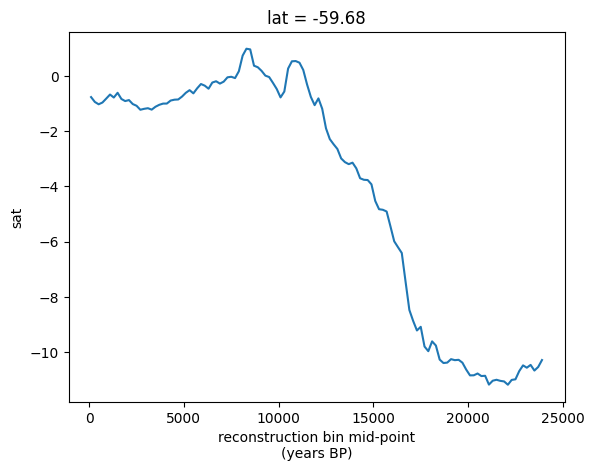

In [9]:
LGMR_sat_60s.plot()

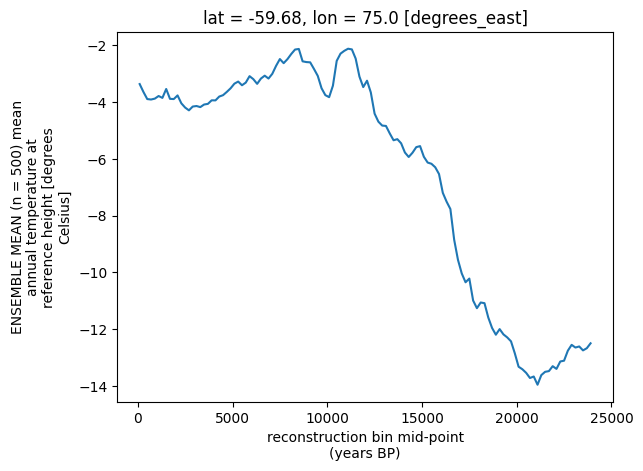

In [13]:
selected_data_at_60s['sat'].isel(lon=30).plot()

# Extract the data between 50 to 70°S, and calculate the weighted average

In [62]:
import xarray as xr
from toolbox import change_point_functions as cpf

ds_sat = cpf.cal_anomalies(ds_sat, years=2000)
ds_sat_subset = ds_sat.sel(lat=slice(-70, -50))

weights_broadcasted = ds_sat_subset['weight'].broadcast_like(ds_sat_subset['sat'])
sum_weighted_sat = (ds_sat_subset['sat_anomalies'] * weights_broadcasted).sum(dim=['lat', 'lon'])
sum_weight_sat = weights_broadcasted.sum(dim=['lat', 'lon'])

weighted_avg_sat_mean = sum_weighted_sat / sum_weight_sat

c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


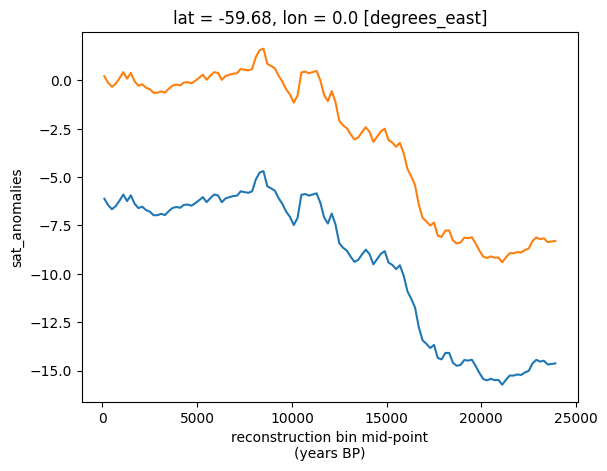

In [63]:
from matplotlib import pyplot as plt

ds_sat['sat'].sel(lat=-60, lon=0,method='nearest').plot()
ds_sat['sat_anomalies'].sel(lat=-60, lon=0,method='nearest').plot()


# Do the same for the ensamble LGMR data

In [72]:
# read the processed netcdf file
import xarray as xr
import numpy as np
from toolbox import change_point_functions as cpf

ds_sat_ens =  xr.open_dataset('data/LGMR_SAT_ens.nc') #xr.open_dataset('ens_ana_data/LGMR_SAT_ens_processed.nc')

weight = np.cos(np.deg2rad(ds_sat_ens['lat']))
# set weight to 0 if it is smaller than 0
weight = xr.where(weight < 0, 0, weight)

ds_sat_ens['weight']=weight

weighted_avg_sat_ens=[]
    
for i in range(len(ds_sat_ens['nEns'])):
    # Select the ensemble member
    ds_sat_i = ds_sat_ens.isel(nEns=i)
    ds_sat_i = cpf.cal_anomalies(ds_sat_i, years=2000)
    ds_sat_subset = ds_sat_i.sel(lat=slice(-70, -50))

    weights_broadcasted = ds_sat_subset['weight'].broadcast_like(ds_sat_subset['sat'])
    sum_weighted_sat = (ds_sat_subset['sat_anomalies'] * weights_broadcasted).sum(dim=['lat', 'lon'])
    sum_weight_sat = weights_broadcasted.sum(dim=['lat', 'lon'])

    weighted_avg_sat = sum_weighted_sat / sum_weight_sat
    weighted_avg_sat_ens.append(weighted_avg_sat.values)
    # if i==10:
    #     break


c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarr

In [73]:
# preserve the weighted_avg_sat_mean using pickle
import pickle
with open('D:/VScode/Last_deglaciation/data_fig3/weighted_avg_sat_mean.pickle', 'wb') as f:
    pickle.dump(weighted_avg_sat_mean, f)

# preserve the weighted_avg_sat_ens using pickle
import pickle
with open('D:/VScode/Last_deglaciation/data_fig3/weighted_avg_sat_ens.pickle', 'wb') as f:
    pickle.dump(weighted_avg_sat_ens, f)

# Read LGMR SIC data
Ref: New data from M. Osman

In [79]:
path='D:/VScode/Last_deglaciation/data/LGMR_SIC_May2023.nc'

# read the nc file from the path
import xarray as xr
import numpy as np

ds_seaice = xr.open_dataset(path)
ds_seaice = ds_seaice.where(ds_seaice.age>=10000, drop=True)

# Calculate the weight based on latitude
weight = np.cos(np.deg2rad(ds_seaice['lat']))
print('shape of the weight:', weight.shape)

weight = xr.where(weight < 0, 0, weight)

ds_seaice['weight'] = weight


ds_seaice

shape of the weight: (96,)


c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


<xarray.Dataset>
Dimensions:  (dims: 5, age: 70, lat: 96, lon: 144)
Coordinates:
  * lat      (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * age      (age) float32 1.01e+04 1.03e+04 1.05e+04 ... 2.37e+04 2.39e+04
  * dims     (dims) object 'mean              ' ... '97.5percentile    '
Data variables:
    sic      (dims, age, lat, lon) float32 0.0 0.0 0.0 ... 0.9979 0.9979 0.9979
    weight   (lat) float32 0.0 0.03306 0.06609 0.09905 ... 0.06609 0.03306 0.0

# Clculate the sea ice area of the LGMR

In [80]:
import xarray as xr


ds_seaice_subset = ds_seaice.sel(lat=slice(-90, 0))


import numpy as np

# Constants
R = 6371  # Earth's radius in km
delta_theta= 2.5/180*np.pi # 2.5 degree in radians

# Convert latitude values to radians
lat_radians = np.radians(ds_seaice_subset['lat'].values)
print('shape of lat_radians:', lat_radians.shape)
# Compute latitudinal boundaries
lat_boundaries = (lat_radians[:-1] + lat_radians[1:]) / 2
print('shape of lat_boundaries:', lat_boundaries.shape)

A=R**2*delta_theta*(np.sin(lat_boundaries[1:])-np.sin(lat_boundaries[:-1]))# area of each grid, Ref: https://www.johndcook.com/blog/2023/02/21/sphere-grid-area/#:~:text=Area%20of%20latitude%2Flongitude%20grid&text=A%20%3D%20%CF%80%20R%C2%B2%20(sin%20%CF%86,1%20%E2%88%92%20%CE%B82)%2F180.
print('shape of A:', A.shape)

A_center_lats=ds_seaice_subset['lat'].values[1:-1]
print('shape of A_center_lats:', A_center_lats.shape)

# remove the data corresponds to the last and firs lat in ds_seaice_subset
ds_seaice_subset_reduced=ds_seaice_subset.isel(lat=slice(1,-1))


# Step 1: Create an xarray DataArray for A with the dimension 'lat' and values of 'A_center_lats'
A_xr = xr.DataArray(A, dims=["lat"], coords={"lat": A_center_lats})

# Step 2: Multiply sic data at dim=0 with A
# Selecting the mean sea ice concentration (sic at dim=0)
sic_mean = ds_seaice_subset_reduced['sic'][0, :, :]

# Multiplying sic with A
sic_area = sic_mean * A_xr

# Step 3: Sum up the resulting product over the latitude (and longitude, if needed)
LGMR_sic_area = sic_area.sum(dim=["lat", "lon"]).values/1e6

# add age to LGMR_sic_area so it got two columns
LGMR_sic_area=np.column_stack((ds_seaice_subset_reduced['age'].values,LGMR_sic_area))

# save the LGMR_sic_area using pickle
import pickle
with open('D:/VScode/Last_deglaciation/data_fig3/LGMR_sic_area.pickle', 'wb') as f:
    pickle.dump(LGMR_sic_area, f)

# LGMR_sic_area


shape of lat_radians: (48,)
shape of lat_boundaries: (47,)
shape of A: (46,)
shape of A_center_lats: (46,)


Text(0, 0.5, 'Sea ice area (10^6 km^2)')

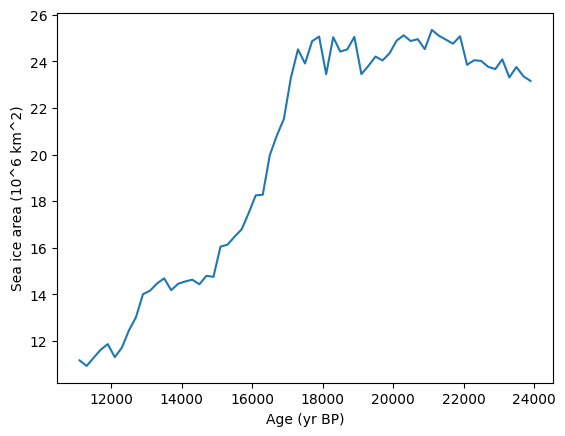

In [5]:
#plot total_sic_area
import matplotlib.pyplot as plt
plt.plot(LGMR_sic_area[:,0],LGMR_sic_area[:,1]) 
plt.xlabel('Age (yr BP)')
plt.ylabel('Sea ice area (10^6 km^2)') 

# Read orbital parameters
Ref: Laskar et al., 2004

In [6]:
# Read the ecc_0_500kyr_inter100.txt under /data_fig3

import pandas as pd

path='D:/VScode/Last_deglaciation/data_fig3/'
df_ecc=pd.read_csv(path+'ecc_0_500kyr_inter100.txt', sep='\s+', header=None)
df_ecc.columns=['age', 'ecc']
df_ecc['age']=-1*df_ecc['age']*1000
df_ecc=df_ecc.iloc[::-1]
df_ecc.to_csv(path+'df_ecc.csv', index=False)

df_ecc

,age,ecc
5000,-0.0,0.016702
4999,100.0,0.016750
4998,200.0,0.016797
4997,300.0,0.016845
4996,400.0,0.016892
...,...,...
4,499600.0,0.033901
3,499700.0,0.033871
2,499800.0,0.033841
1,499900.0,0.033812


In [11]:
import pandas as pd

path='D:/VScode/Last_deglaciation/data_fig3/'
df_obl=pd.read_csv(path+'obliquity_0_500kyr_inter100.txt', sep='\s+', header=None)
df_obl.columns=['age', 'obl']
df_obl['age']=-1*df_obl['age']*1000
df_obl=df_obl.iloc[::-1]
df_obl.to_csv(path+'df_obl.csv', index=False)
df_obl

,age,obl
5000,-0.0,0.409093
4999,100.0,0.409320
4998,200.0,0.409547
4997,300.0,0.409773
4996,400.0,0.410000
...,...,...
4,499600.0,0.414205
3,499700.0,0.414106
2,499800.0,0.414005
1,499900.0,0.413902


In [10]:
# Read the pre_0_500kyr_inter100.txt under /data_fig3

import pandas as pd

path='D:/VScode/Last_deglaciation/data_fig3/'
df_pre=pd.read_csv(path+'pre_0_500kyr_inter100.txt', sep='\s+', header=None)
df_pre.columns=['age', 'pre']
df_pre['age']=-1*df_pre['age']*1000
df_pre=df_pre.iloc[::-1]
df_pre.to_csv(path+'df_pre.csv', index=False)

df_pre

,age,pre
5000,-0.0,0.016280
4999,100.0,0.016431
4998,200.0,0.016568
4997,300.0,0.016690
4996,400.0,0.016798
...,...,...
4,499600.0,0.012835
3,499700.0,0.011893
2,499800.0,0.010943
1,499900.0,0.009986


# Read EBM data

In [64]:
# read the /data_fig3/EMB_results.xlsx
import pandas as pd
path='D:/VScode/Last_deglaciation/EBM_data/'
filename='EBM_results_shorten_Jan31.xlsx'

df_full_orbital_EBM=pd.read_excel(path+filename, sheet_name='Full-orbital')
# the first column*1000
df_full_orbital_EBM['age']=df_full_orbital_EBM['age']*1000
# save the df_full_orbital to csv
df_full_orbital_EBM.to_csv(path+'df_full_orbital_EBM.csv', index=False)
df_full_orbital_EBM.head()

,age,60S summer inso (21 Dec to 21 Feb),Inter_summer_inso,SAT (50 to 70S),iceA (SH),ice_asy,summer_duration
0,10000,427.336750,5.564279,-1.029714,23.891422,NaN,NaN
1,11000,428.465963,5.557092,-1.058631,24.010389,NaN,NaN
2,12000,430.701655,5.551410,-1.096506,24.172172,NaN,NaN
3,13000,433.812557,5.542759,-1.128241,24.309235,NaN,NaN
4,14000,437.481913,5.532736,-1.161961,24.439776,NaN,NaN


In [7]:
import pandas as pd

df_obl_EBM=pd.read_excel(path+filename, sheet_name='Obl only')
# the first column*1000
df_obl_EBM['age']=df_obl_EBM['age']*1000
# save the df_obl to csv
df_obl_EBM.to_csv(path+'df_obl_EBM.csv', index=False)

df_obl_EBM.head()


,age,60S summer inso (21 Dec to 21 Feb),Inter_summer_inso,SAT (50 to 70S),iceA (SH),ice_asy,summer_duration
0,10000,463.423124,5.604459,-0.925008,23.509560,NaN,NaN
1,11000,463.181351,5.601785,-0.937702,23.557459,NaN,NaN
2,12000,462.676038,5.596196,-0.954712,23.627859,NaN,NaN
3,13000,461.929575,5.585563,-0.978717,23.711195,NaN,NaN
4,14000,460.953519,5.572391,-1.014674,23.831427,NaN,NaN


In [8]:
import pandas as pd
df_pre_EBM=pd.read_excel(path+filename, sheet_name='Pre only')
# the first column*1000
df_pre_EBM['age']=df_pre_EBM['age']*1000
# save the df_pre to csv
df_pre_EBM.to_csv(path+'df_pre_EBM.csv', index=False)

df_pre_EBM.head()

,age,60S summer inso (21 Dec to 21 Feb),Inter_summer_inso,SAT (50 to 70S),iceA (SH),ice_asy,summer_duration
0,10000,416.618614,5.403442,-1.521472,25.668195,NaN,NaN
1,11000,417.919917,5.398930,-1.541726,25.764954,NaN,NaN
2,12000,420.535264,5.401208,-1.552348,25.818325,NaN,NaN
3,13000,424.230549,5.400803,-1.549264,25.821833,NaN,NaN
4,14000,428.699372,5.406304,-1.537670,25.788731,NaN,NaN


In [9]:
import pandas as pd

df_GHG_EBM=pd.read_excel(path+filename, sheet_name='GHG')
# the first column*1000
df_GHG_EBM['age']=df_GHG_EBM['age']*1000
# save the df_pre to csv
df_GHG_EBM.to_csv(path+'df_GHG_EBM.csv', index=False)

df_GHG_EBM.head()

,age,60S summer inso (21 Dec to 21 Feb),Inter_summer_inso,SAT (50 to 70S),iceA (SH),ice_asy,summer_duration
0,10000,427.336750,5.564279,2.548542,11.794610,NaN,NaN
1,11000,428.465963,5.557092,2.655429,11.442139,NaN,NaN
2,12000,430.701655,5.551410,1.846439,14.263134,NaN,NaN
3,13000,433.812557,5.542759,1.749034,14.615075,NaN,NaN
4,14000,437.481913,5.532736,1.649764,14.990463,NaN,NaN


In [65]:
import pandas as pd

df_all_forcing_EBM=pd.read_excel(path+filename, sheet_name='All Forcing')
# the first column*1000
df_all_forcing_EBM['age']=df_all_forcing_EBM['age']*1000
# save the df_pre to csv
df_all_forcing_EBM.to_csv(path+'df_all_forcing_EBM.csv', index=False)

df_all_forcing_EBM.head()

,age,60S summer inso (21 Dec to 21 Feb),Inter_summer_inso,SAT (50 to 70S),iceA (SH),ice_asy,summer_duration
0,10000,427.336750,5.564279,2.517873,11.903615,NaN,NaN
1,11000,428.465963,5.557092,2.454374,12.136794,NaN,NaN
2,12000,430.701655,5.551410,1.476181,15.510074,NaN,NaN
3,13000,433.812557,5.542759,1.187269,16.530932,NaN,NaN
4,14000,437.481913,5.532736,0.899832,17.528899,NaN,NaN


# Load TraCE data
Ref He et al., 2011

In [1]:
import xarray as xr

path='D:/VScode/Last_deglaciation/TraCE_data/'
trace_orb = xr.open_dataset(path + 'b30.00_4kaDVTj.cam2.ncrcat.ann.nc')
trace_allforcing_sat = xr.open_dataset(path+'trace.01-36.22000BP.cam2.TREFHT.22000BP_decavg_400BCE.nc')
trace_allforcing_sic=xr.open_dataset(path+'trace.01-36.22000BP.cam2.ICEFRAC.22000BP_decavg_400BCE.nc')


trace_orb = trace_orb.rename({'TREFHT': 'sat'})
trace_orb = trace_orb.rename({'time': 'age'})
trace_orb['age'] = trace_orb['age'] * -1000
trace_orb['sat'] = trace_orb['sat'] - 273.15 # convert to Celsius

trace_orb_sat = trace_orb[['sat']]
trace_orb_sic = trace_orb[['ICEFRAC']]


trace_allforcing_sat = trace_allforcing_sat.rename({'TREFHT': 'sat'})
trace_allforcing_sat = trace_allforcing_sat.rename({'time': 'age'})
trace_allforcing_sat['age'] = trace_allforcing_sat['age'] * -1000
trace_allforcing_sat['sat'] = trace_allforcing_sat['sat'] - 273.15
trace_allforcing_sat = trace_allforcing_sat[['sat']]


trace_allforcing_sic = trace_allforcing_sic.rename({'time': 'age'})
trace_allforcing_sic['age'] = trace_allforcing_sic['age'] * -1000
trace_allforcing_sic = trace_allforcing_sic[['ICEFRAC']]


6.774467945098877

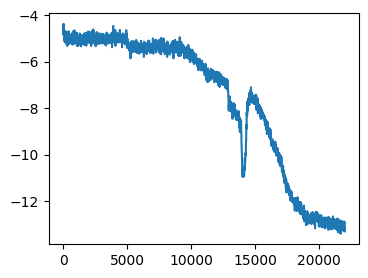

In [27]:
import xarray as xr

selected_data_at_60s = trace_allforcing_sat.sel(lat=-60, method="nearest")

trace_sat_60s = selected_data_at_60s['sat'].mean(dim='lon')

import matplotlib.pyplot as plt

# Plotting the mean SAT time series at latitude -60 degrees
plt.figure(figsize=(4, 3))  # Set the figure size
plt.plot(trace_sat_60s['age'], trace_sat_60s, label='Mean SAT at -60°')

sat_at_21000 = trace_sat_60s.sel(age=21000, method='nearest').item()
sat_at_11000 = trace_sat_60s.sel(age=11000, method='nearest').item()

# Calculate the difference: later (11000) - former (21000)
difference = sat_at_11000 - sat_at_21000
difference

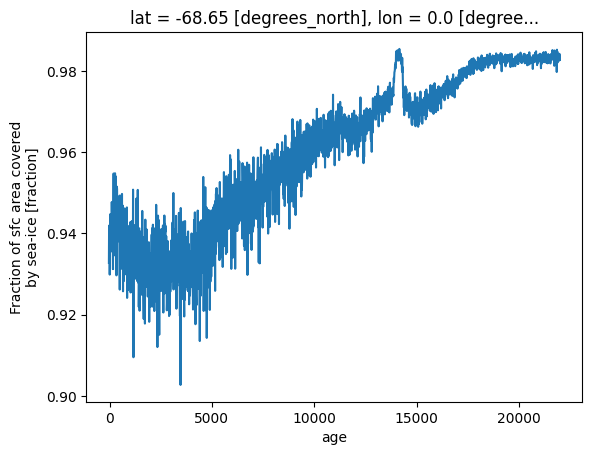

In [7]:
import matplotlib.pyplot as plt

# Selecting the ICEFRAC data variable and then the specific grid cell
icefrac_data = trace_allforcing_sic['ICEFRAC'].isel(lat=5, lon=0)

# Now plot the data
icefrac_data.plot()

plt.show()


# Calculate the weighted average for the given latitude band for TraCE data

In [2]:
# Function to calculate the weighted average SAT
import numpy as np
import xarray as xr

def calculate_weighted_avg_sat(ds, lat_min=-75, lat_max=-60):
    # Calculate the weight based on latitude
    weight = np.cos(np.deg2rad(ds['lat']))
    weight = xr.where(weight < 0, 0, weight)
    ds['weight'] = weight

    # print the size of the original dataset
    print('size of the original dataset:',ds['sat'].size)
    
    # Select the subset based on latitude
    trace_orb_sat_subset = ds.sel(lat=slice(lat_min, lat_max))
    # PRINT THE SIZE OF THE SUBSET
    print('size of the subset:',trace_orb_sat_subset['sat'].size)

    # Broadcast the weights to the same shape as 'sat'
    weights_broadcasted = trace_orb_sat_subset['weight'].broadcast_like(trace_orb_sat_subset['sat'])

    # Calculate the sum of weighted 'sat' values and the sum of weights
    sum_weighted_sat = (trace_orb_sat_subset['sat'] * weights_broadcasted).sum(dim=['lat', 'lon'])
    sum_weights = weights_broadcasted.sum(dim=['lat', 'lon'])

    # Calculate the weighted average
    weighted_avg_sat = sum_weighted_sat / sum_weights

    return weighted_avg_sat



In [3]:
weighted_avg_orb = calculate_weighted_avg_sat(trace_orb_sat, lat_min=-70, lat_max=-50)
weighted_avg_allforcing = calculate_weighted_avg_sat(trace_allforcing_sat, lat_min=-70, lat_max=-50)

weighted_avg_orb_nh = calculate_weighted_avg_sat(trace_orb_sat, lat_min=50, lat_max=70)

size of the original dataset: 10156032
size of the subset: 1269504
size of the original dataset: 10156032
size of the subset: 1269504
size of the original dataset: 10156032
size of the subset: 1269504


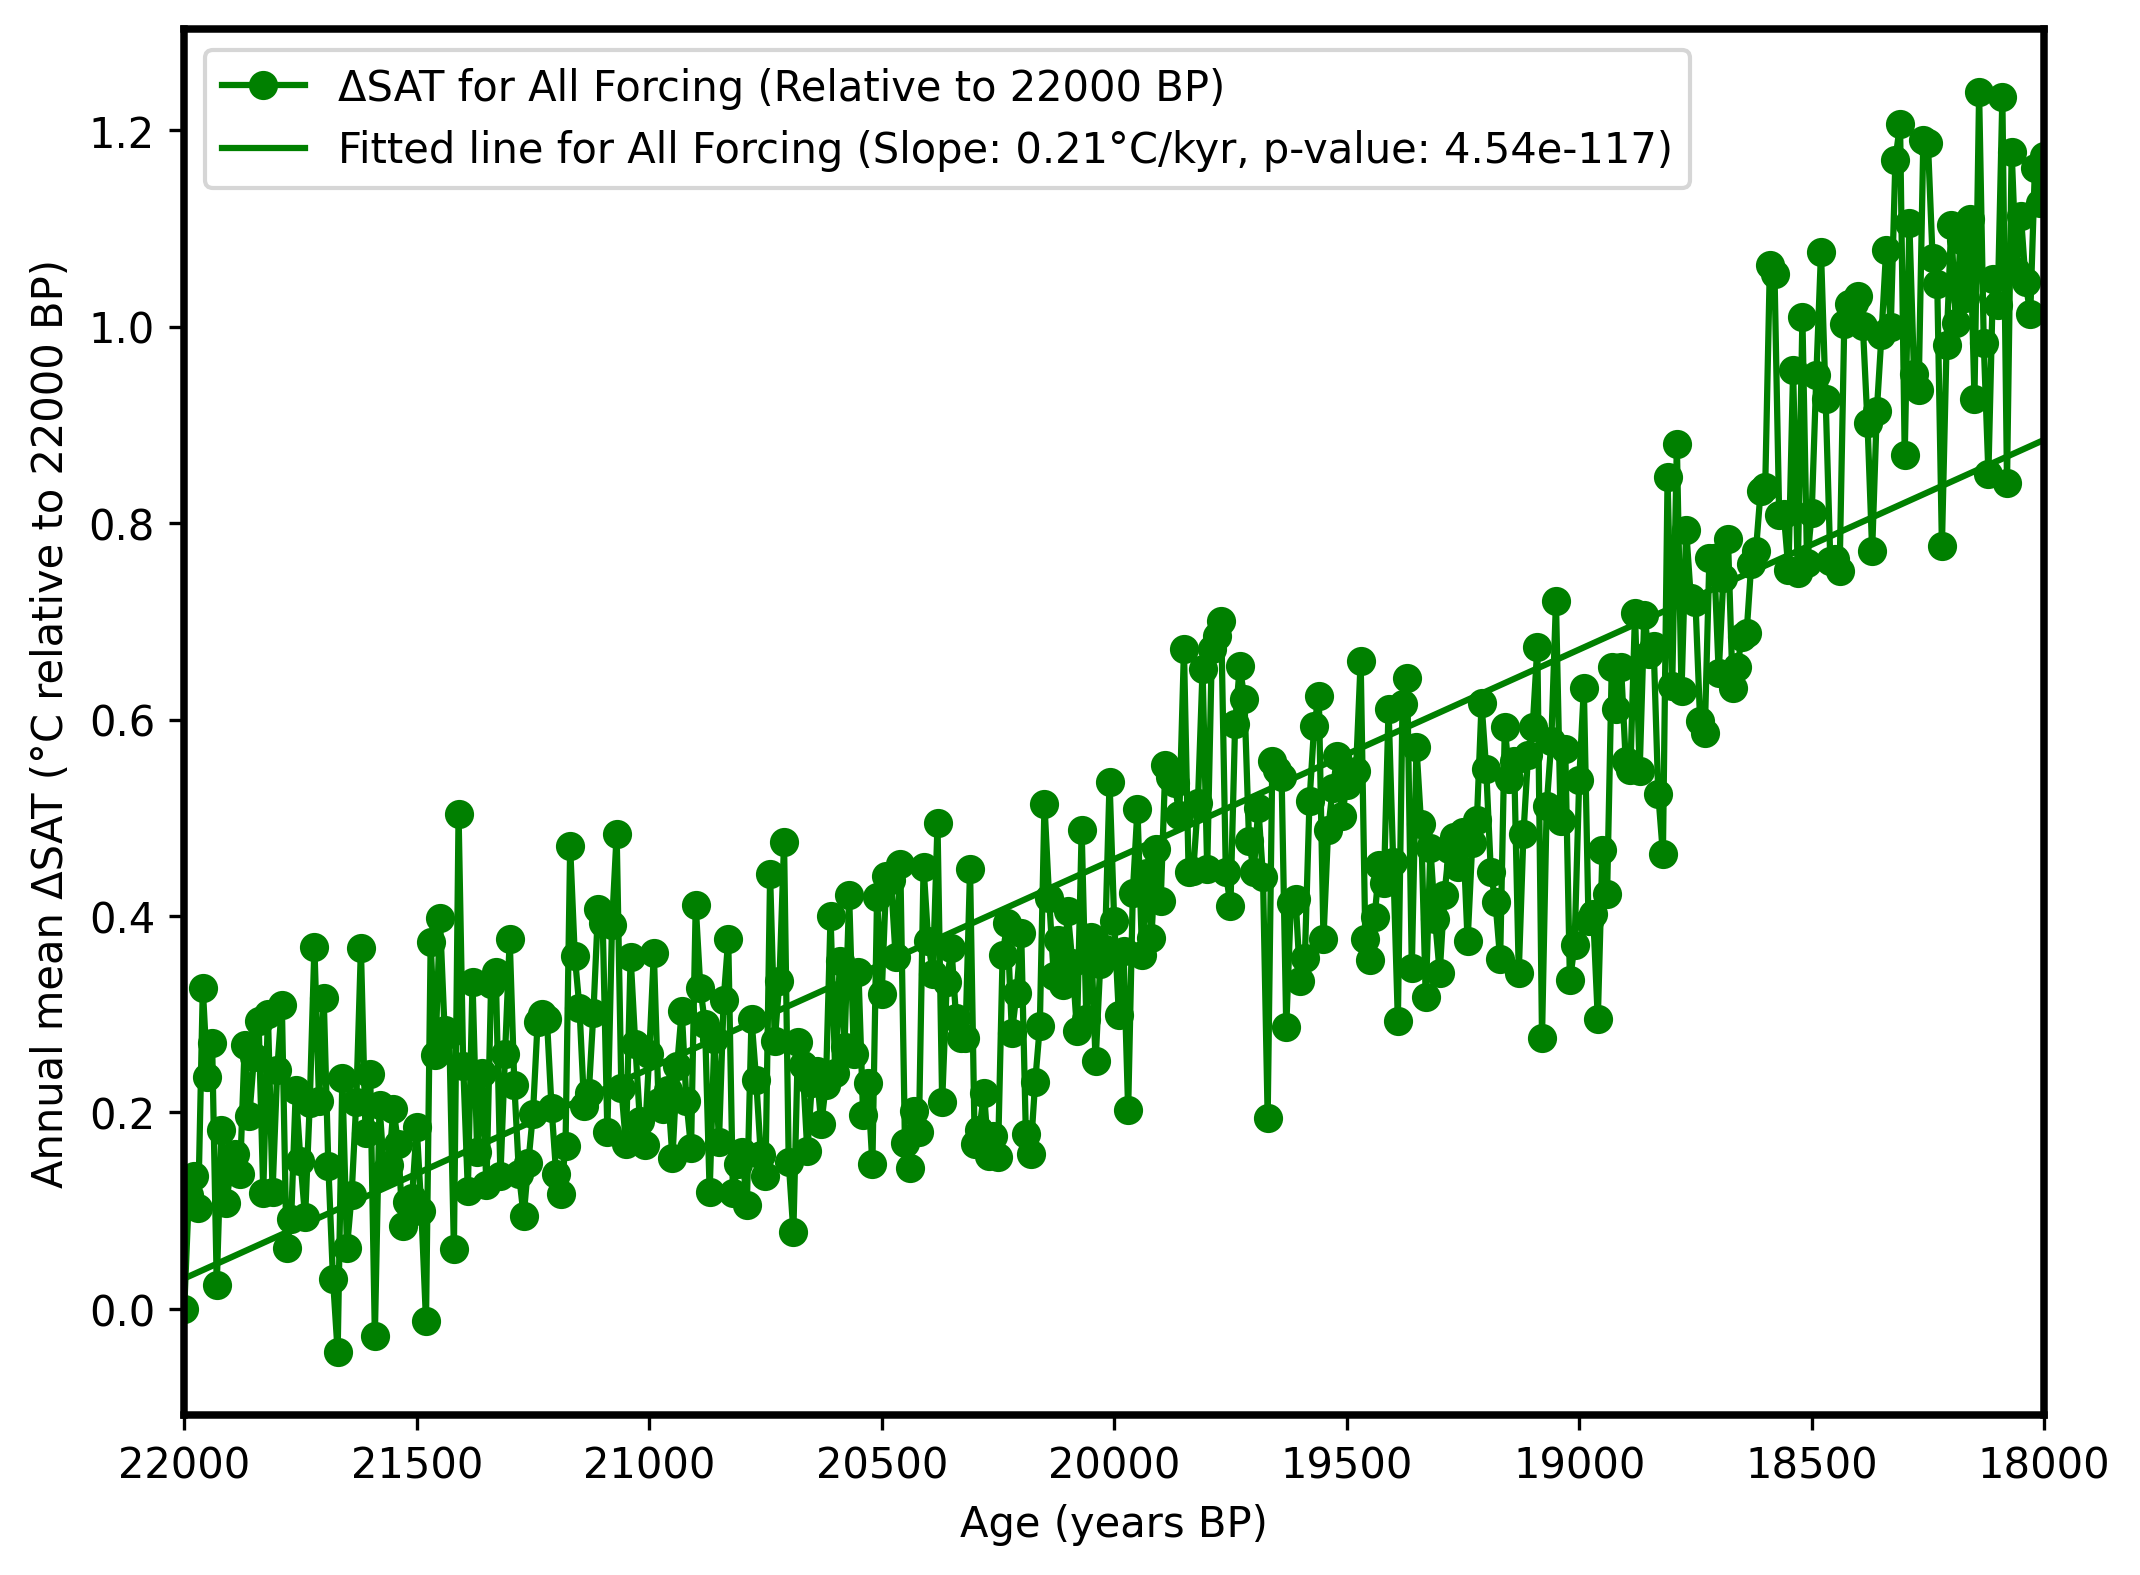

(0.2134428049930089, 4.537247192754674e-117, -0.8537712199720358)

In [5]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Crop the data between 19 to 22 kyr before fitting the line and plotting
weighted_avg_allforcing = weighted_avg_allforcing.sel(age=slice(22000, 18000))

age_allforcing = weighted_avg_allforcing['age'].values
temp_allforcing = weighted_avg_allforcing.values

# Step 3: Adjust temperatures relative to their value at 22000 BP
temp_allforcing_baseline = temp_allforcing[np.argmin(np.abs(age_allforcing - 22000))]
temp_allforcing_relative = temp_allforcing - temp_allforcing_baseline

# Step 4: Fit a straight line to the adjusted dataset
slope_allforcing, intercept_allforcing, r_value_allforcing, p_value_allforcing, std_err_allforcing = stats.linregress(age_allforcing, temp_allforcing_relative)

# Calculate the y-values based on the fitted line to the adjusted data
fitted_y_allforcing = slope_allforcing * age_allforcing + intercept_allforcing

# Plotting
plt.figure(figsize=(8, 6), dpi=300)  # Adjusted for better visibility

# Original data points adjusted relative to their values at 22000 BP
plt.plot(age_allforcing, temp_allforcing_relative, 'o-', color='green', label='ΔSAT for All Forcing (Relative to 22000 BP)')

# Fitted lines for the adjusted data
plt.plot(age_allforcing, fitted_y_allforcing, 'g-', label=f'Fitted line for All Forcing (Slope: {slope_allforcing*-1000:.2f}°C/kyr, p-value: {p_value_allforcing:.2e})')

# Enhance plot appearance
plt.gca().spines['top'].set_linewidth(1.8)
plt.gca().spines['right'].set_linewidth(1.8)
plt.gca().spines['bottom'].set_linewidth(1.8)
plt.gca().spines['left'].set_linewidth(1.8)

plt.xlabel('Age (years BP)')
plt.ylabel('Annual mean ΔSAT (°C relative to 22000 BP)')
plt.legend()
plt.xlim(18000, 22000)
plt.gca().invert_xaxis()  # Invert x-axis to have older ages on the right
plt.show()

# Return slope in °C/kyr, p-value, and temperature difference from 22 to 19 kyr for the allforcing dataset
(slope_allforcing*-1000, p_value_allforcing, fitted_y_allforcing[0] - fitted_y_allforcing[-1])


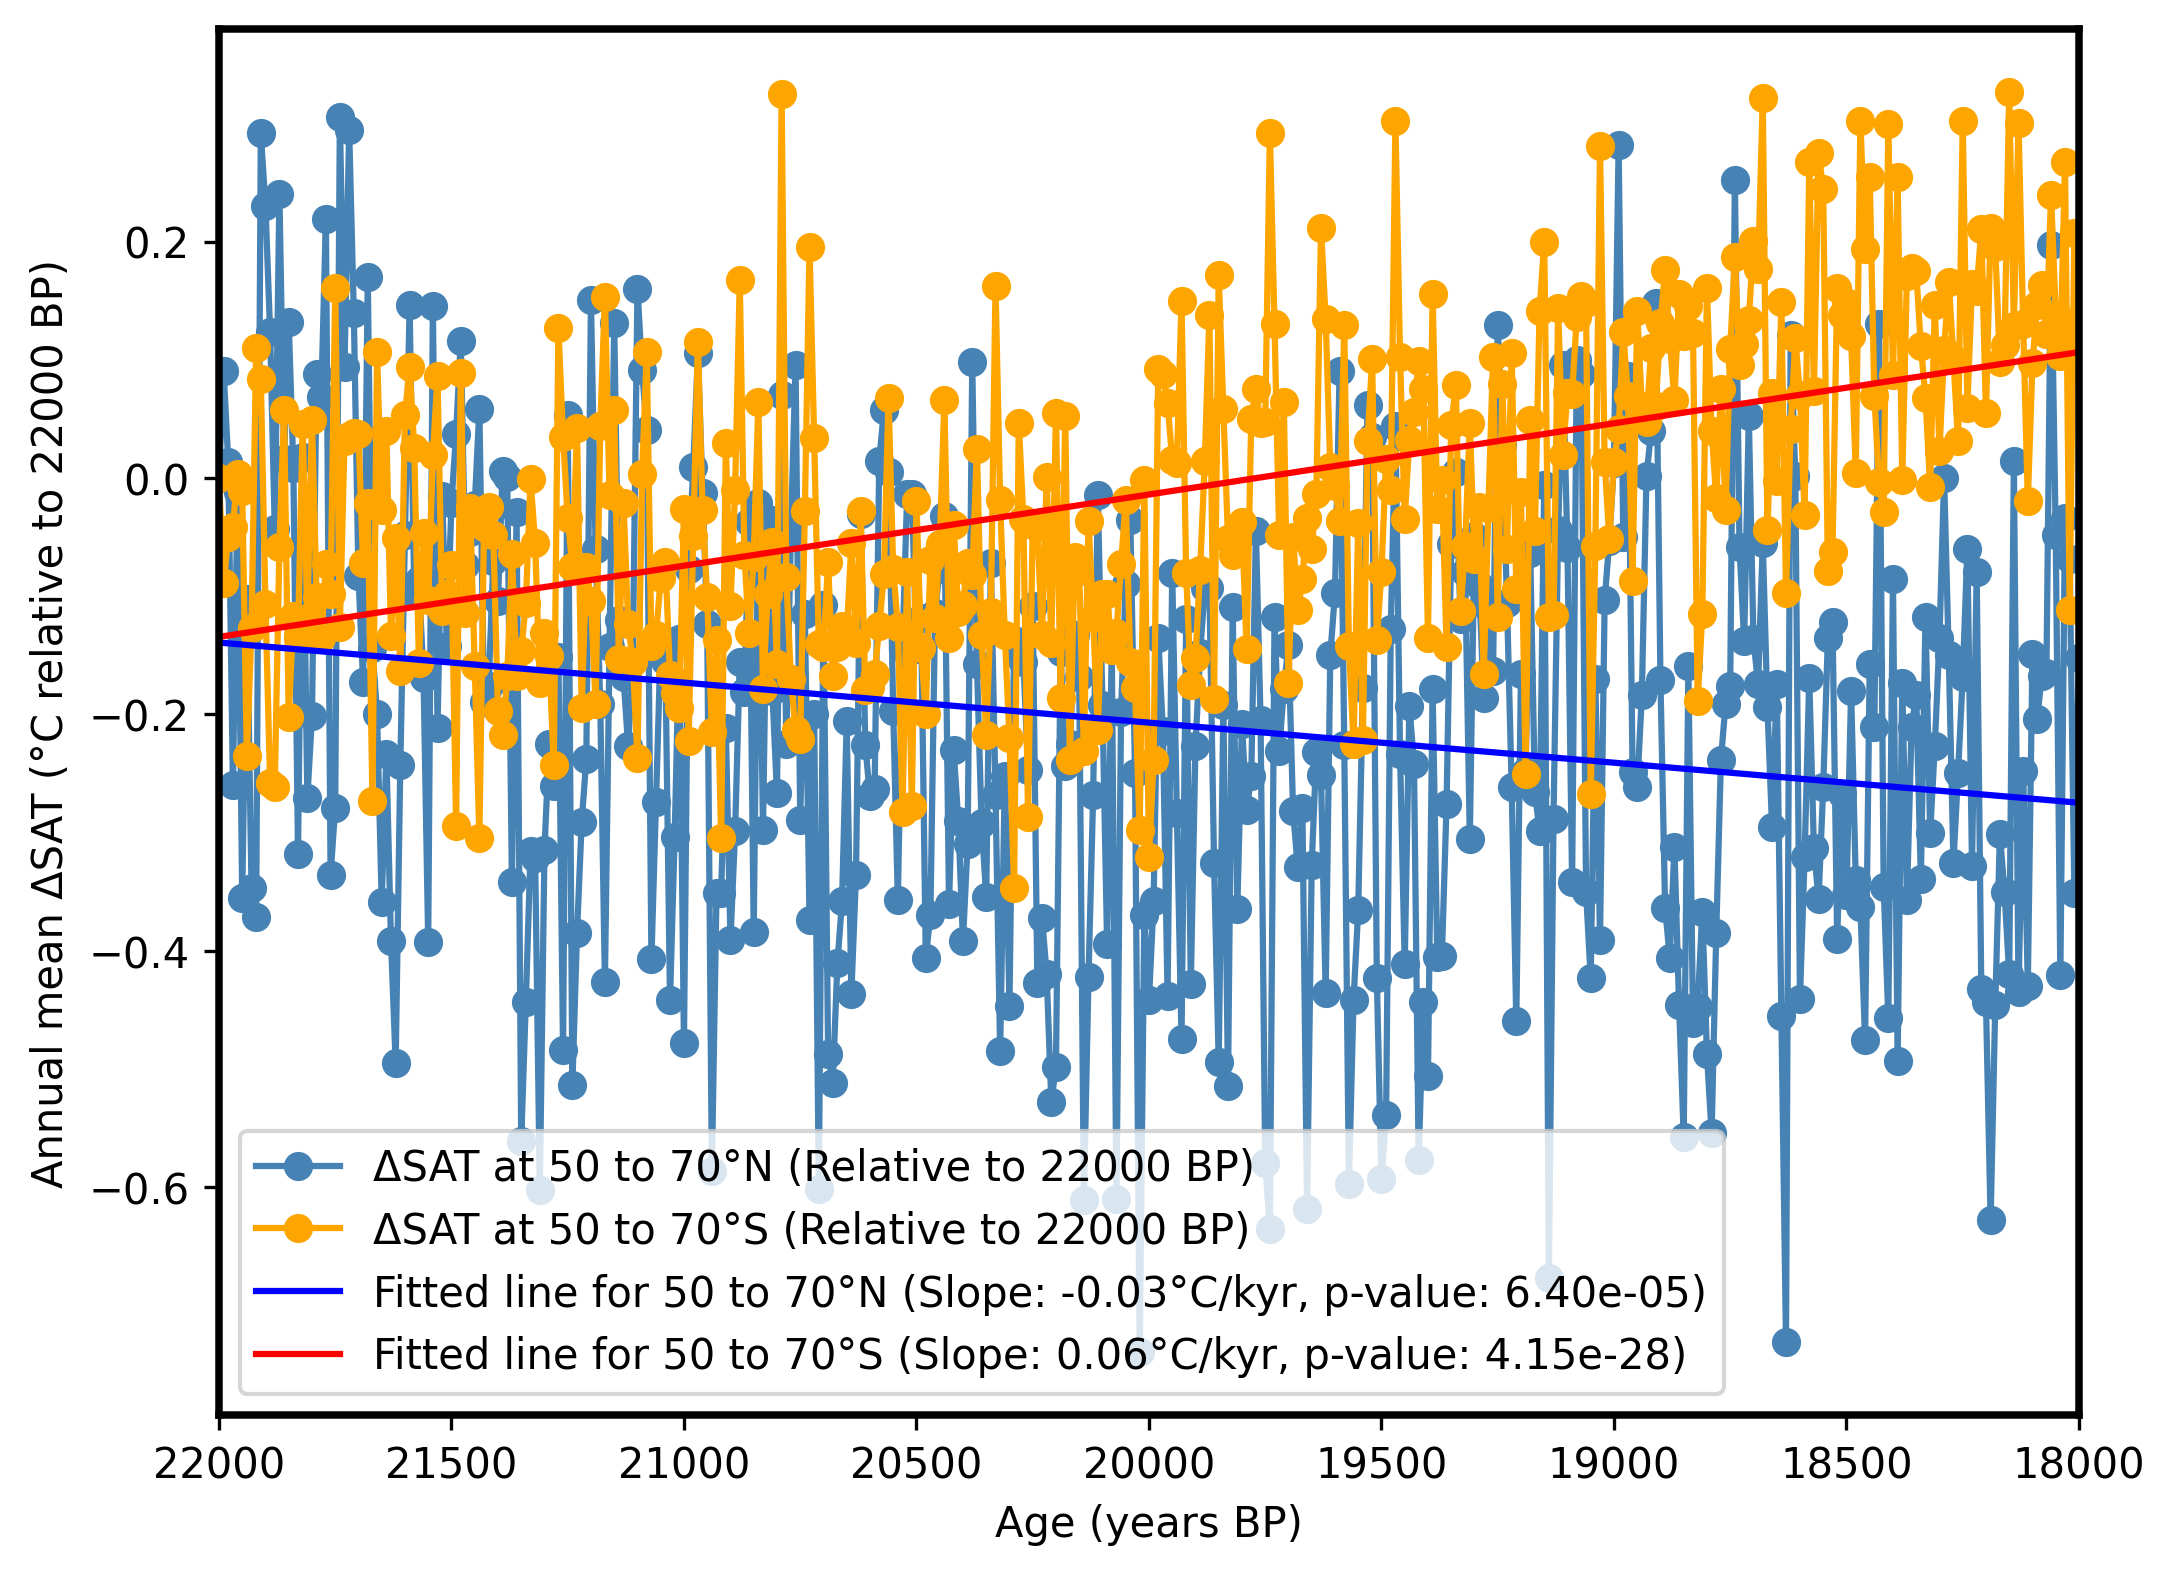

((0.06024576547991482, 4.146964624272575e-28, -0.24098306191965935),
 (-0.033890617410916424, 6.403596946229066e-05, 0.1355624696436657))

In [8]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

# Assuming weighted_avg_orb and weighted_avg_orb_nh are xarray DataArray objects
# Ensure these objects are correctly defined before this code snippet

# Crop the data between 19 to 22 kyr before fitting the line and plotting
weighted_avg_orb = weighted_avg_orb.sel(age=slice(22000, 18000))
weighted_avg_orb_nh = weighted_avg_orb_nh.sel(age=slice(22000, 18000))

age_orb = weighted_avg_orb['age'].values
temp_orb = weighted_avg_orb.values
temp_orb_nh = weighted_avg_orb_nh.values

# Adjust temperatures relative to their value at 22000 BP
temp_orb_baseline = temp_orb[np.argmin(np.abs(age_orb - 22000))]
temp_orb_nh_baseline = temp_orb_nh[np.argmin(np.abs(age_orb - 22000))]

temp_orb_relative = temp_orb - temp_orb_baseline
temp_orb_nh_relative = temp_orb_nh - temp_orb_nh_baseline

# Fit a straight line to the adjusted datasets
slope_orb, intercept_orb, r_value_orb, p_value_orb, std_err_orb = stats.linregress(age_orb, temp_orb_relative)
slope_orb_nh, intercept_orb_nh, r_value_orb_nh, p_value_orb_nh, std_err_orb_nh = stats.linregress(age_orb, temp_orb_nh_relative)

# Calculate the y-values based on the fitted line to the adjusted data
fitted_y_orb = slope_orb * age_orb + intercept_orb
fitted_y_orb_nh = slope_orb_nh * age_orb + intercept_orb_nh

# Plotting
plt.figure(figsize=(8, 6),dpi=300)  # Adjusted for better visibility

# Original data points adjusted relative to their values at 22000 BP
plt.plot(age_orb, temp_orb_nh_relative, 'o-', color='steelblue', label='ΔSAT at 50 to 70°N (Relative to 22000 BP)')
plt.plot(age_orb, temp_orb_relative, 'o-', color='orange', label='ΔSAT at 50 to 70°S (Relative to 22000 BP)')

# Fitted lines for the adjusted data
plt.plot(age_orb, fitted_y_orb_nh, 'b-', label=f'Fitted line for 50 to 70°N (Slope: {slope_orb_nh*-1000:.2f}°C/kyr, p-value: {p_value_orb_nh:.2e})')
plt.plot(age_orb, fitted_y_orb, 'r-', label=f'Fitted line for 50 to 70°S (Slope: {slope_orb*-1000:.2f}°C/kyr, p-value: {p_value_orb:.2e})')

# Enhance plot appearance
plt.gca().spines['top'].set_linewidth(1.8)
plt.gca().spines['right'].set_linewidth(1.8)
plt.gca().spines['bottom'].set_linewidth(1.8)
plt.gca().spines['left'].set_linewidth(1.8)

plt.xlabel('Age (years BP)')
plt.ylabel('Annual mean ΔSAT (°C relative to 22000 BP)')
plt.legend()
plt.xlim(18000, 22000)
# set y lim
# plt.ylim(-1.1, 0.4)
plt.gca().invert_xaxis()  # Invert x-axis to have older ages on the right
plt.show()

# Return slope in °C/kyr, p-value, and temperature difference from 22 to 19 kyr for both datasets
(slope_orb*-1000, p_value_orb, fitted_y_orb[0] - fitted_y_orb[-1]), (slope_orb_nh*-1000, p_value_orb_nh, fitted_y_orb_nh[0] - fitted_y_orb_nh[-1])


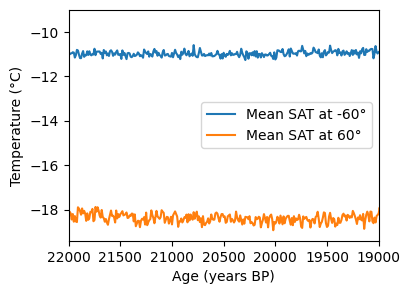

In [6]:
# plot the weighted_avg_orb and weighted_avg_orb_nh

import matplotlib.pyplot as plt

# Plotting the mean SAT time series at latitude -60 degrees
plt.figure(figsize=(4, 3))  # Set the figure size
plt.plot(weighted_avg_orb['age'], weighted_avg_orb, label='Mean SAT at -60°')
plt.plot(weighted_avg_orb_nh['age'], weighted_avg_orb_nh, label='Mean SAT at 60°')
plt.xlabel('Age (years BP)')
plt.ylabel('Temperature (°C)')
plt.legend()
# se the xlimt
plt.xlim(19000, 22000)
# invert the x axis
plt.gca().invert_xaxis()


# Process data and store

In [ ]:

sat_series_orb = weighted_avg_orb.to_series()
sat_series_allforcing = weighted_avg_allforcing.to_series()

# Calculate a 20 point moving average, centered
smoothed_sat_orb = sat_series_orb.rolling(window=20, center=True).mean()
smoothed_sat_allforcing = sat_series_allforcing.rolling(window=20, center=True).mean()

trace_age=trace_orb_sat['age'].values
# convert the sat_series_orb, sat_series_ghg, smoothed_sat_orb, smoothed_sat_ghg to ndarray
sat_series_orb=sat_series_orb.to_numpy()
sat_series_allforcing=sat_series_allforcing.to_numpy()
smoothed_sat_orb=smoothed_sat_orb.to_numpy()
smoothed_sat_allforcing=smoothed_sat_allforcing.to_numpy()


path='D:/VScode/Last_deglaciation/data_fig3/'
# save the array
np.save(path+'trace_age.npy',trace_age)
np.save(path+'sat_series_orb.npy',sat_series_orb)
np.save(path+'sat_series_allforcing.npy',sat_series_allforcing)

np.save(path+'smoothed_sat_orb.npy',smoothed_sat_orb)
np.save(path+'smoothed_sat_allforcing.npy',smoothed_sat_allforcing)


# Calculate sea ice area forTraCE

In [4]:
import xarray as xr
import numpy as np
import pickle

def calculate_seaice_area(ds_seaice, variable_name='sic',lat_min=-90,lat_max=0):    
    # Subset dataset for latitude from -90 to 0
    ds_seaice_subset = ds_seaice.sel(lat=slice(lat_min, lat_max))

    # Constants
    R = 6371  # Earth's radius in km
    delta_theta = 2.5 / 180 * np.pi  # 2.5 degree in radians

    # Convert latitude values to radians and compute latitudinal boundaries
    lat_radians = np.radians(ds_seaice_subset['lat'].values)
    lat_boundaries = (lat_radians[:-1] + lat_radians[1:]) / 2

    # area of each grid, 
    # Ref: https://www.johndcook.com/blog/2023/02/21/sphere-grid-area/#:~:text=Area%20of%20latitude%2Flongitude%20grid&text=A%20%3D%20%CF%80%20R%C2%B2%20(sin%20%CF%86,1%20%E2%88%92%20%CE%B82)%2F180.
    A = R**2 * delta_theta * (np.sin(lat_boundaries[1:]) - np.sin(lat_boundaries[:-1]))
    A_center_lats = ds_seaice_subset['lat'].values[1:-1]

    # Reduce dataset size
    ds_seaice_subset_reduced = ds_seaice_subset.isel(lat=slice(1, -1))

    # Create an xarray DataArray for A
    A_xr = xr.DataArray(A, dims=["lat"], coords={"lat": A_center_lats})

    # Multiply sic data with A
    sic = ds_seaice_subset_reduced[variable_name]
    sic_area = sic * A_xr

    # Sum up the resulting product
    LGMR_sic_area = sic_area.sum(dim=["lat", "lon"]).values / 1e6
    # print('LGMR_sic_area:', LGMR_sic_area.shape)

    # Add age to LGMR_sic_area
    LGMR_sic_area = np.column_stack((ds_seaice_subset_reduced['age'].values, LGMR_sic_area))

    return LGMR_sic_area


In [3]:

asice_trace_orb=calculate_seaice_area(trace_orb_sic, variable_name='ICEFRAC')
asice_trace_allforcing=calculate_seaice_area(trace_allforcing_sic, variable_name='ICEFRAC') 

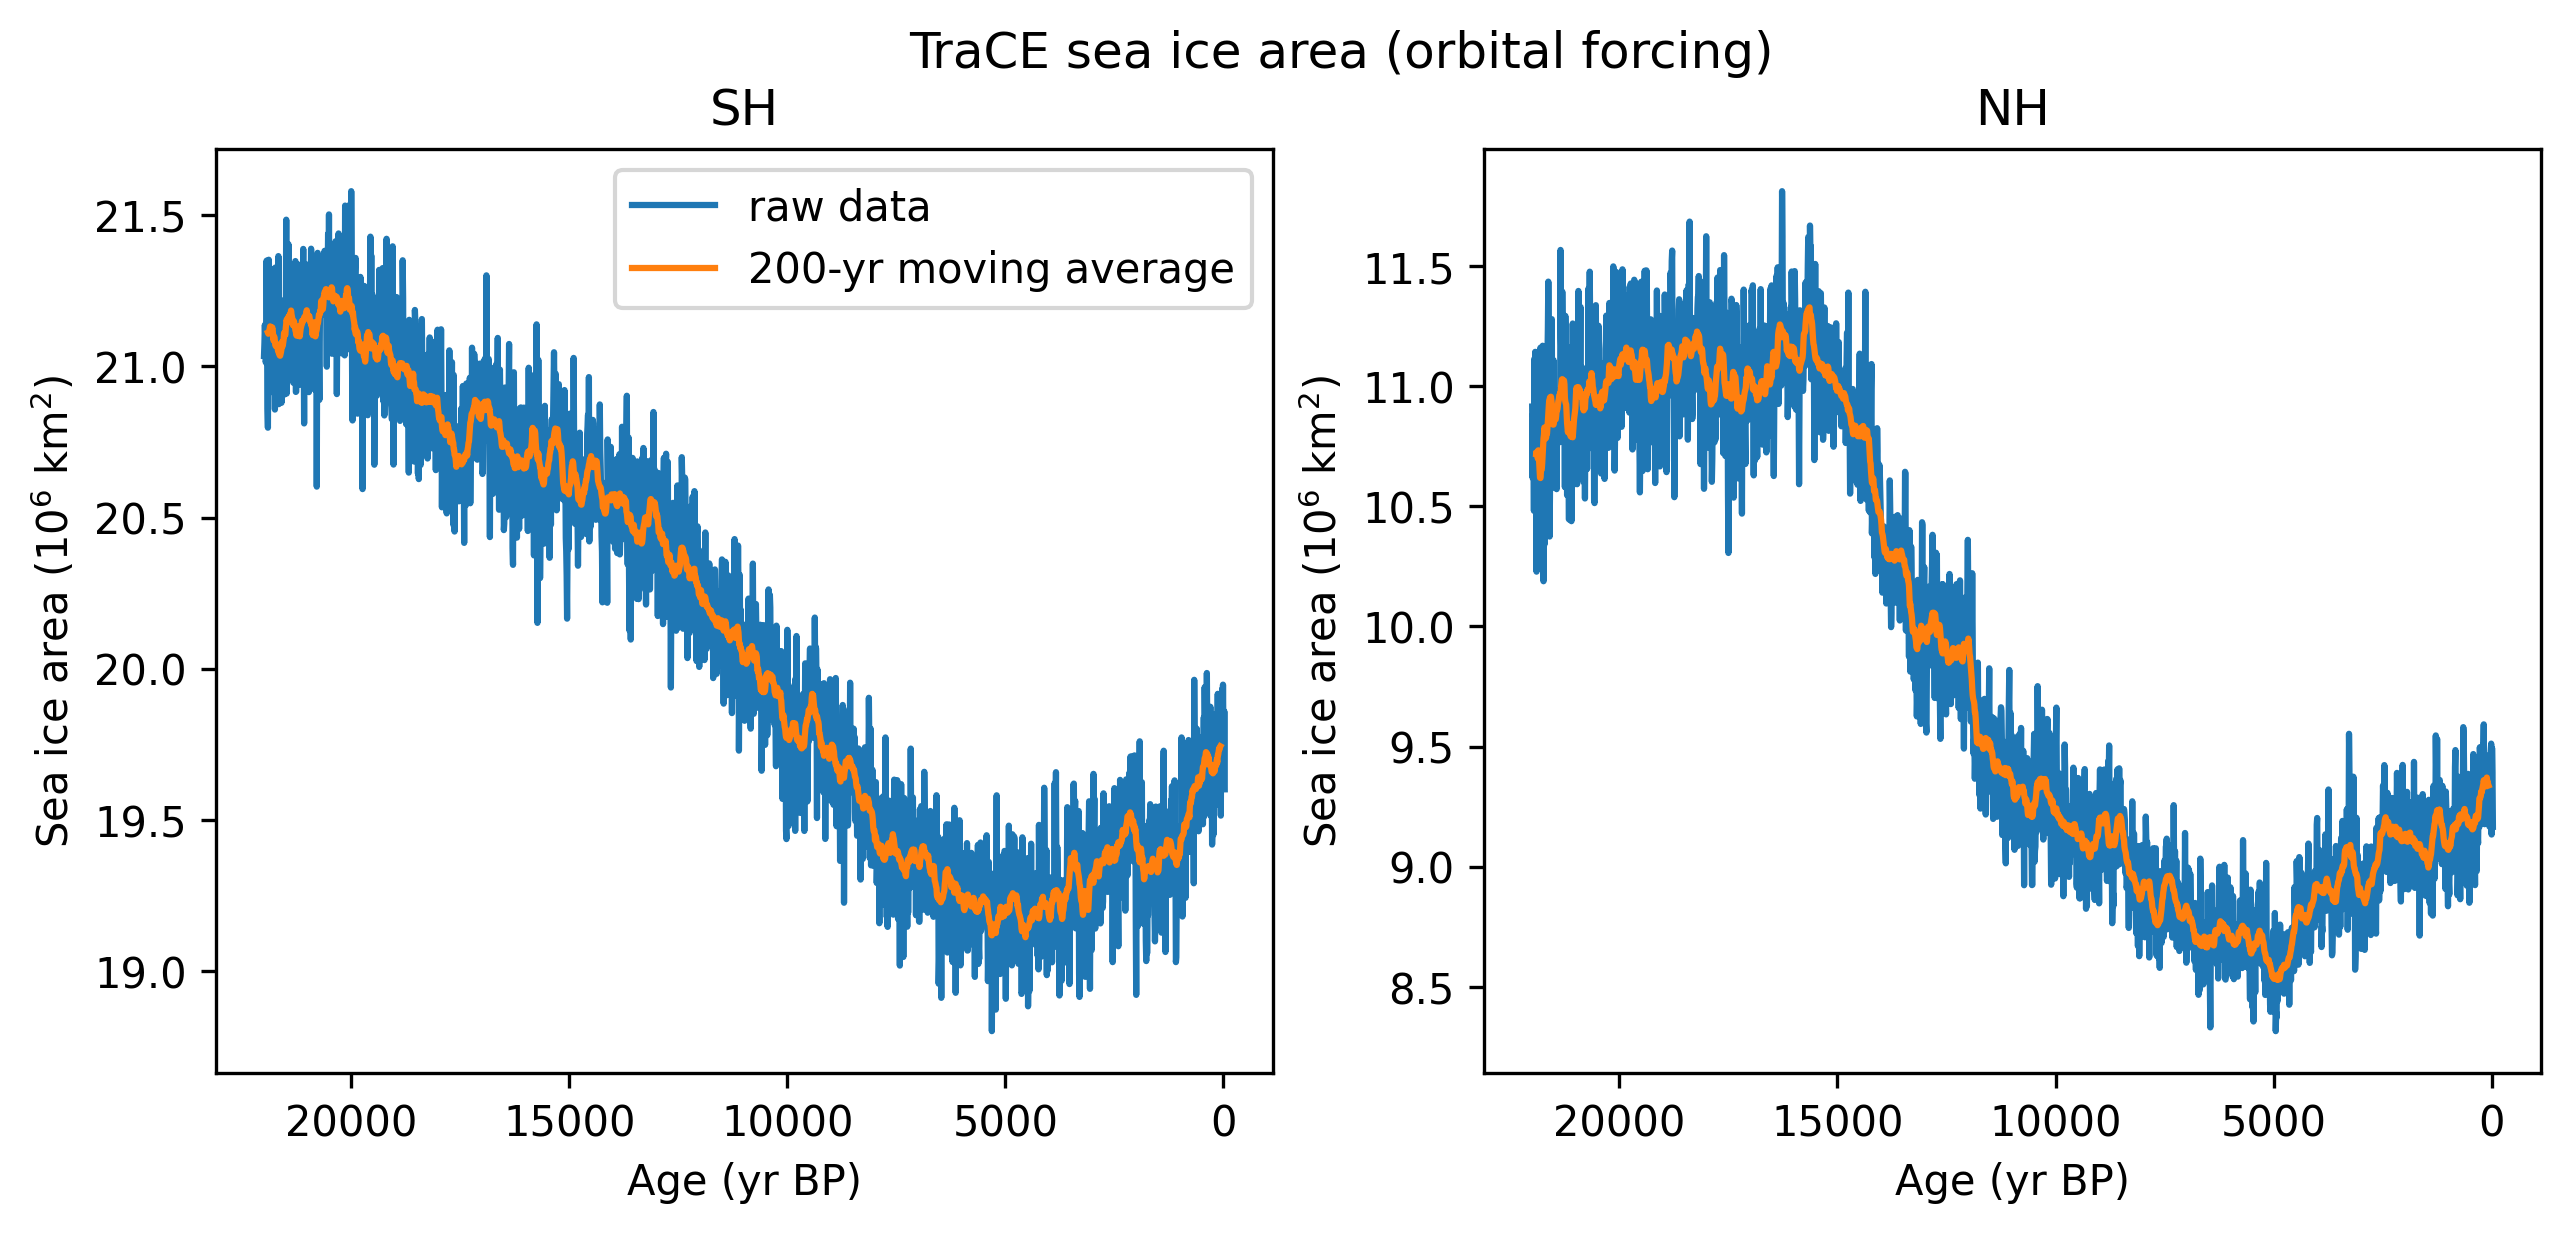

In [28]:
asice_trace_orb_sh = calculate_seaice_area(trace_orb_sic, variable_name='ICEFRAC', lat_min=-90, lat_max=0)
asice_trace_allforcing_sh = calculate_seaice_area(trace_allforcing_sic, variable_name='ICEFRAC', lat_min=-90, lat_max=0)

asice_trace_orb_nh = calculate_seaice_area(trace_orb_sic, variable_name='ICEFRAC', lat_min=0, lat_max=90)
asice_trace_allforcing_nh = calculate_seaice_area(trace_allforcing_sic, variable_name='ICEFRAC', lat_min=0, lat_max=90)

# plot asice_trace_orb_sh and asice_trace_orb_nh side by side

# Smooth the data with a 10-point moving average
import numpy as np
def moving_average(data, points=10):
    return np.convolve(data, np.ones(points)/points, mode='valid')

# plot asice_trace_orb_sh and asice_trace_orb_nh side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4),dpi=300)
fig.suptitle('TraCE sea ice area (orbital forcing)')

smoothing_len=20

# Apply the moving average to your data
smoothed_asice_trace_orb_sh = moving_average(asice_trace_orb_sh[:, 1], smoothing_len)
smoothed_asice_trace_orb_nh = moving_average(asice_trace_orb_nh[:, 1], smoothing_len)

# Since the moving average reduces the length of the data, adjust the x-axis data accordingly
adjusted_x_sh = asice_trace_orb_sh[9:-10, 0]  # Adjusting for a 10-point average
adjusted_x_nh = asice_trace_orb_nh[9:-10, 0]  # Same here

ax1.plot(asice_trace_orb_sh[:, 0], asice_trace_orb_sh[:, 1], label='raw data')
ax1.plot(adjusted_x_sh, smoothed_asice_trace_orb_sh,label='200-yr moving average')
ax1.set_title('SH')
ax1.set_xlabel('Age (yr BP)')
ax1.set_ylabel('Sea ice area ($10^6$ km$^2$)')
ax1.legend()
ax1.invert_xaxis()

ax2.plot(asice_trace_orb_nh[:, 0], asice_trace_orb_nh[:, 1], label='NH')
ax2.plot(adjusted_x_nh, smoothed_asice_trace_orb_nh)
ax2.set_title('NH')
ax2.set_xlabel('Age (yr BP)')
ax2.set_ylabel('Sea ice area ($10^6$ km$^2$)')
ax2.invert_xaxis()

plt.show()


In [6]:
asice_trace_orb_sh

array([[ 2.20000000e+04,  2.10345264e+01],
       [ 2.19899998e+04,  2.10769806e+01],
       [ 2.19799995e+04,  2.11376536e+01],
       ...,
       [-1.00002289e+01,  1.96056082e+01],
       [-2.00004578e+01,  1.98588308e+01],
       [-2.99987793e+01,  1.96005992e+01]])

In [ ]:
# save the asice_trace_orb using pickle
import pickle
with open('D:/VScode/Last_deglaciation/data_fig3/asice_trace_orb.pickle', 'wb') as f:
    pickle.dump(asice_trace_orb, f)

# save the asice_trace_allforcing using pickle
import pickle
with open('D:/VScode/Last_deglaciation/data_fig3/asice_trace_allforcing.pickle', 'wb') as f:
    pickle.dump(asice_trace_allforcing, f)

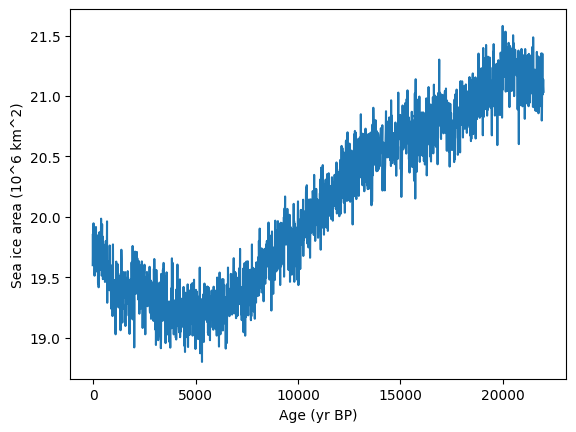

In [39]:
# plot the asice
import matplotlib.pyplot as plt
plt.plot(asice_trace_orb[:,0],asice_trace_orb[:,1])
plt.xlabel('Age (yr BP)')
plt.ylabel('Sea ice area (10^6 km^2)')
plt.show()

# Load all data

In [1]:
import pandas as pd
import numpy as np
import xarray as xr

# load orbital parameters
path='D:/VScode/Last_deglaciation/data_fig3/'
df_ecc=pd.read_csv(path+'df_ecc.csv')
df_pre=pd.read_csv(path+'df_pre.csv')
df_obl=pd.read_csv(path+'df_obl.csv')

# Load summer insolation and intergrated summer insolation of 60°S
inso60s=pd.read_csv('D:/VScode/Last_deglaciation/data_fig3/inso60s.csv')
df_inter_ann=pd.read_csv('D:/VScode/Last_deglaciation/data_fig3/df_inter_ann.csv')



# Load the proxy sea ice data
df_proxy_sea_ice = pd.read_csv('data_fig3/Chadwick et al-2022_Stacks_PCA.csv')
df_proxy_seaice_pc = pd.read_csv('data_fig3/Chadwick et al-2022_Stacks_PCA_pc.csv')

# load the LGMR_sic_area using pickle
import pickle
with open('D:/VScode/Last_deglaciation/data_fig3/LGMR_sic_area.pickle', 'rb') as f:
    LGMR_sic_area = pickle.load(f)

# # Load LGMR SAT and SIC data
# data_dir = 'D:/VScode/Last_deglaciation/data'
# ds_sat_EOFs_MC = xr.open_dataset(data_dir + '/ds_sat_EOFs_MC.nc')
    
# open the 'LGMR_GMST_ens.nc' file
ds_sat = xr.open_dataset('data/LGMR_SAT_climo.nc')

path='D:/VScode/Last_deglaciation/data/LGMR_SIC_May2023.nc'
ds_seaice = xr.open_dataset(path)
ds_seaice = ds_seaice.where(ds_seaice.age>=11000, drop=True)




# sat of the 50 to 70°S
# read the weighted_avg_sat_mean
import pickle
with open('D:/VScode/Last_deglaciation/data_fig3/weighted_avg_sat_mean.pickle', 'rb') as f:
    weighted_avg_sat_mean = pickle.load(f)
    
# read the weighted_avg_sat_ens using pickle
import pickle
with open('D:/VScode/Last_deglaciation/data_fig3/weighted_avg_sat_ens.pickle', 'rb') as f:
    weighted_avg_sat_ens = pickle.load(f)


# sat of the class 0
import pickle
with open('ens_ana_data/all_weighted_avg_curves_checked.pkl', 'rb') as f:
    all_weighted_avg_curves = pickle.load(f)

weighted_avg_curves_k = [curves[0] for curves in all_weighted_avg_curves]

data_dir = 'D:/VScode/Last_deglaciation/climo_ana_data'
ds_sat = xr.open_dataset(data_dir + '/ds_GMM_climo_relabeled.nc')

time_of_class0=ds_sat['age'].values


# loop through each data in weighted_avg_curves_k and calculate the mean between index 35 to 54 (correpsonding to 18100 to 21000 BP)
for j in range(len(weighted_avg_curves_k)):
    data=weighted_avg_curves_k[j]
    data_18100_21000=np.mean(data[35:55])
    data=data-data_18100_21000
    weighted_avg_curves_k[j]=data


# load TraCE data
path='D:/VScode/Last_deglaciation/data_fig3/'
trace_age=np.load(path+'trace_age.npy')
sat_series_orb=np.load(path+'sat_series_orb.npy')
sat_series_ghg=np.load(path+'sat_series_ghg.npy')
sat_series_allforcing=np.load(path+'sat_series_allforcing.npy')
smoothed_sat_orb=np.load(path+'smoothed_sat_orb.npy')
smoothed_sat_ghg=np.load(path+'smoothed_sat_ghg.npy')
smoothed_sat_allforcing=np.load(path+'smoothed_sat_allforcing.npy')

# read the asice_trace_orb using pickle
import pickle
with open('D:/VScode/Last_deglaciation/data_fig3/asice_trace_orb.pickle', 'rb') as f:
    asice_trace_orb=pickle.load(f)

# read the asice_trace_allforcing using pickle
import pickle
with open('D:/VScode/Last_deglaciation/data_fig3/asice_trace_allforcing.pickle', 'rb') as f:
    asice_trace_allforcing=pickle.load(f)


path='D:/VScode/Last_deglaciation/EBM_data/'

# Load the EBM results
# read the df_full_orbital.csv
df_full_orbital_EBM=pd.read_csv(path+'df_full_orbital_EBM.csv')
# read the df_obl.csv
df_obl_EBM=pd.read_csv(path+'df_obl_EBM.csv')
# read the df_pre_EBM.csv
df_pre_EBM=pd.read_csv(path+'df_pre_EBM.csv')
# read the df_GHG_EBM.csv
df_all_forcing_EBM=pd.read_csv(path+'df_all_forcing_EBM.csv')


ebm_list=[df_all_forcing_EBM,df_full_orbital_EBM, df_obl_EBM, df_pre_EBM]



d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\xarray\coding\variables.py:147: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\xarray\coding\variables.py:147: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


In [5]:
df_full_orbital_EBM

,age,60S summer inso (21 Dec to 21 Feb),Inter_summer_inso,SAT (50 to 70S),iceA (SH),ice_asy,summer_duration
0,10000,427.336750,5.564279,-1.029714,23.891422,NaN,NaN
1,11000,428.465963,5.557092,-1.058631,24.010389,NaN,NaN
2,12000,430.701655,5.551410,-1.096506,24.172172,NaN,NaN
3,13000,433.812557,5.542759,-1.128241,24.309235,NaN,NaN
4,14000,437.481913,5.532736,-1.161961,24.439776,NaN,NaN
5,15000,441.350301,5.519766,-1.186053,24.522544,NaN,NaN
6,16000,445.059065,5.509085,-1.220547,24.638237,NaN,NaN
7,17000,448.228688,5.495867,-1.252628,24.740796,NaN,NaN
8,18000,450.562811,5.480637,-1.293526,24.877860,NaN,NaN
9,19000,451.768596,5.463626,-1.331696,24.988860,NaN,NaN


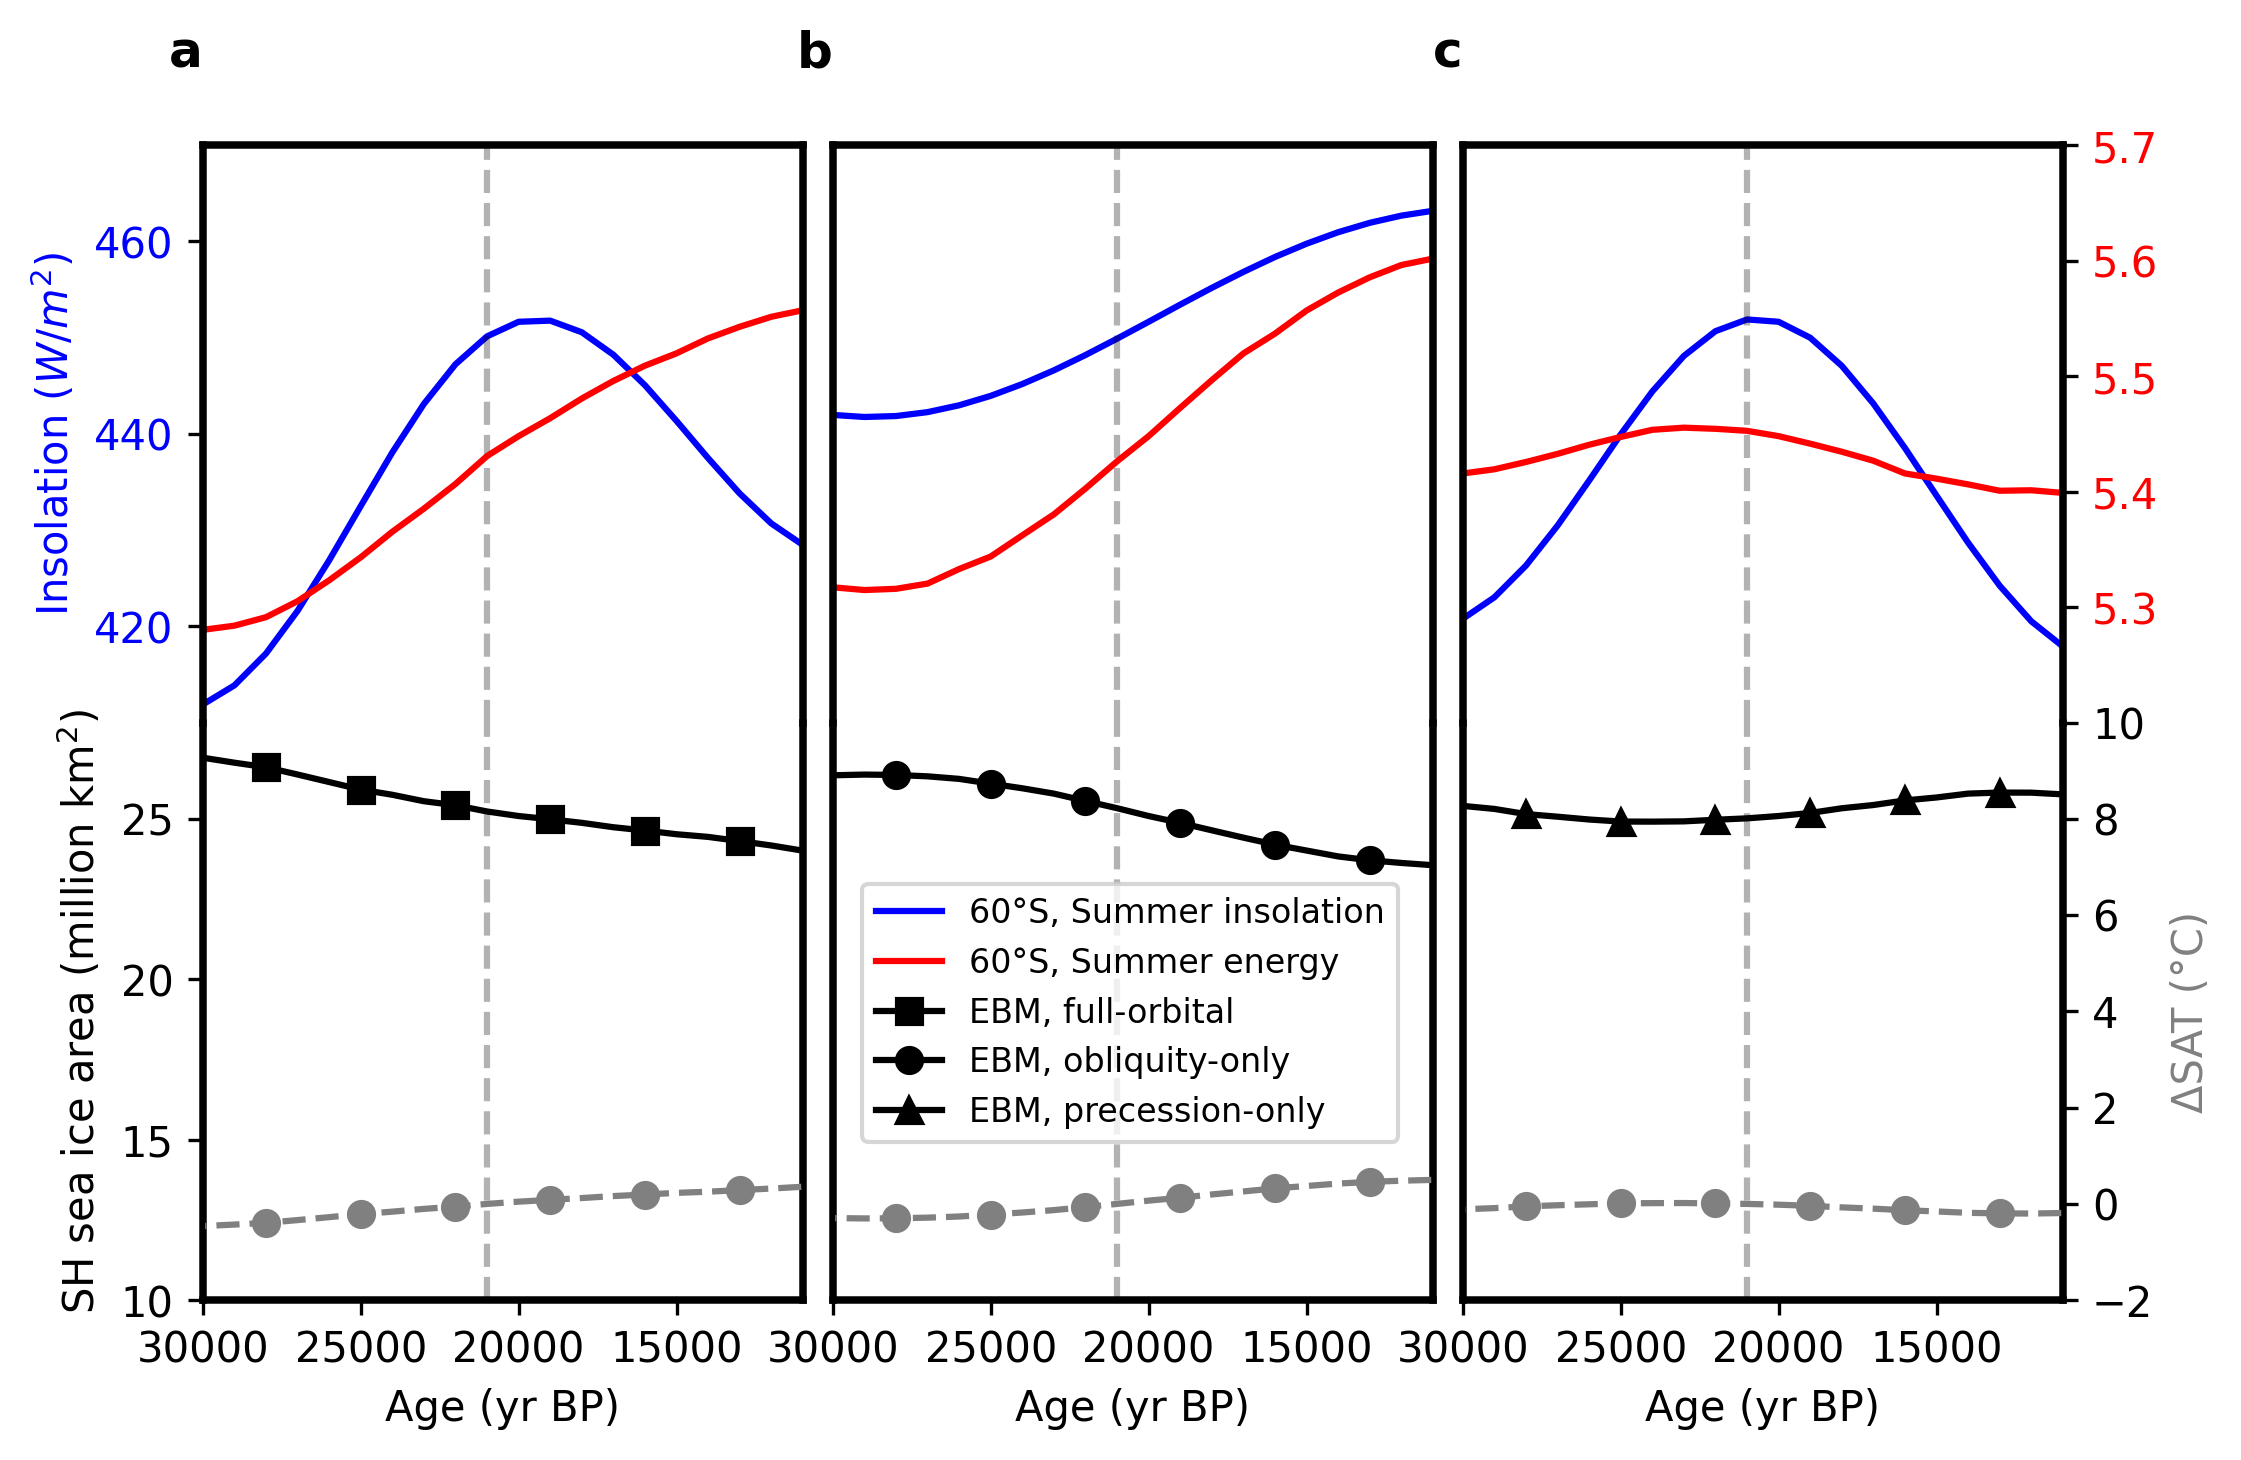

In [28]:
import matplotlib.pyplot as plt


ebm_list=[df_full_orbital_EBM, df_obl_EBM, df_pre_EBM]

# create a figure with 2 by 2 subplots
fig, axs = plt.subplots(2, 3, figsize=(8, 5), dpi=300)
fig.subplots_adjust(hspace=0, wspace=0.05)  # Increase wspace for horizontal spacing, set hspace=0 for no vertical spacing

EBM_labels=['EBM, full-orbital','EBM, obliquity-only', 'EBM, precession-only']
EBM_markers=['s','o','^']
for i in range (3):
    ax=axs[0,i]
    ax.plot(ebm_list[i]['age'], ebm_list[i]['60S summer inso (21 Dec to 21 Feb)'], color='b',  label='Summer insolation, obliquity forcing')
    ax.set_ylim(410, 470)  # Corrected line
    ax.tick_params(axis='y', labelcolor='b')
    # ax.plot(0,0,color='r', label='Summer energy, obliquity foring',)
    # ax.plot(0,0,color='k',label='Sea ice area,obl',marker='^',markevery=3) 
    # ax.legend(loc='lower right')

    ax2 = ax.twinx()
    ax2.plot(ebm_list[i]['age'], ebm_list[i]['Inter_summer_inso'],color='r')
    ax2.set_ylim(5.2, 5.7)  # Corrected line
    # set the y tick labels to cover 5.3 to 5.6 with a step of 0.1
    ax2.set_yticks(np.arange(5.3, 5.7, 0.1))

    # turn off the y tick labels
    ax2.tick_params(axis='y', labelcolor='r')
    ax2.spines['bottom'].set_visible(False)
    # set the line width of the top spine to 1.8
    ax2.spines['top'].set_linewidth(1.8)
    ax2.spines['left'].set_linewidth(1.8)
    ax2.spines['right'].set_linewidth(1.8)
    # ax2.tick_params(axis='y', labelcolor='orange')
    # plot a vertical line at 21 ka
    ax.axvline(x=21000, color='k', linestyle='--',alpha=0.3)
    # # invert x axis
    if i==0:
        ax2.set_yticklabels([])
        ax2.set_yticks([])
        ax.set_ylabel('Insolation ($W/m^2$)', color='b')
        ax.set_yticks([420, 440, 460])
    if i==1:
        ax.set_yticklabels([])
        ax.set_yticks([])
        ax2.set_ylabel('Energy (GJ)', color='r')

        ax2.set_yticklabels([])
        ax2.set_yticks([])
        ax2.set_ylabel('')
    if i==2:
        ax.set_yticklabels([])
        ax.set_yticks([])


    ax=axs[1,i]
    ax.plot(0,0, color='b',  label='60°S, Summer insolation')
    ax.plot(0,0, color='r', label='60°S, Summer energy')
    ax.plot(0,0,color='k',marker=EBM_markers[0],markevery=3,label=EBM_labels[0]) #  
  
    ax.plot(ebm_list[i]['age'], ebm_list[i]['iceA (SH)'].values,color='k',marker=EBM_markers[i],markevery=3,label=EBM_labels[i]) # 
    ax.plot(0,0,color='k',marker=EBM_markers[2],markevery=3,label=EBM_labels[2]) #   
    ax.axvline(x=21000, color='k', linestyle='--',alpha=0.3)
    # set y axis limit
    ax.set_ylim(10, 28)
    # set y tick labels
    ax.set_yticks([10, 15, 20, 25])
    ax.set_xlabel('Age (yr BP)')

    # add a twin y axis
    ax2 = ax.twinx()
    ax2.plot(ebm_list[i]['age'], ebm_list[i]['SAT (50 to 70S)'].values-ebm_list[i]['SAT (50 to 70S)'].values[11],color='grey',linestyle='--',marker=EBM_markers[1],markevery=3,label='EBM, NH')

    ax2.set_ylim(-2, 10)
    # remove the top spine
    ax2.spines['top'].set_visible(False)
    if i!=2:
        ax2.set_yticklabels([])
        ax2.set_yticks([])

    if i==2:
        ax2.set_ylabel('ΔSAT (°C)',color='grey')


    if i==0:
        ax.set_ylabel('SH sea ice area (million km$^2$)')
    if i==1:
        ax.set_yticklabels([])
        # turn off y ticks
        ax.set_yticks([])
        # ax.legend(loc='lower right',fontsize=8)
        # add legend at specified location coordinate
        ax.legend(loc='upper right',bbox_to_anchor=(0.97, 0.75),ncol=1,fontsize=8)

    if i==2:
        ax.set_yticklabels([])
        ax.set_yticks([])

axs[0,0].text(0, 1.2, 'a', transform=axs[0,0].transAxes, fontsize=12, fontweight='bold', va='top', ha='right')
axs[0,1].text(0, 1.2, 'b', transform=axs[0,1].transAxes, fontsize=12, fontweight='bold', va='top', ha='right')
axs[0,2].text(0, 1.2, 'c', transform=axs[0,2].transAxes, fontsize=12, fontweight='bold', va='top', ha='right')
for ax in axs[0, :]:
    ax.set_xlim(30000,11000)
    # turn off the xticklabels
    ax.set_xticklabels([])
    # ax.invert_xaxis()
    ax.spines['bottom'].set_visible(False)
for ax in axs[1, :]:
    ax.set_xlim(30000,11000)
    # ax.invert_xaxis()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_linewidth(1.8)
    ax.spines['left'].set_linewidth(1.8)
    ax.spines['bottom'].set_linewidth(1.8)






# Plot

In [10]:
time_of_class0

array([11100., 11300., 11500., 11700., 11900., 12100., 12300., 12500.,
       12700., 12900., 13100., 13300., 13500., 13700., 13900., 14100.,
       14300., 14500., 14700., 14900., 15100., 15300., 15500., 15700.,
       15900., 16100., 16300., 16500., 16700., 16900., 17100., 17300.,
       17500., 17700., 17900., 18100., 18300., 18500., 18700., 18900.,
       19100., 19300., 19500., 19700., 19900., 20100., 20300., 20500.,
       20700., 20900., 21100., 21300., 21500., 21700., 21900., 22100.,
       22300., 22500., 22700., 22900., 23100., 23300., 23500., 23700.,
       23900.], dtype=float32)

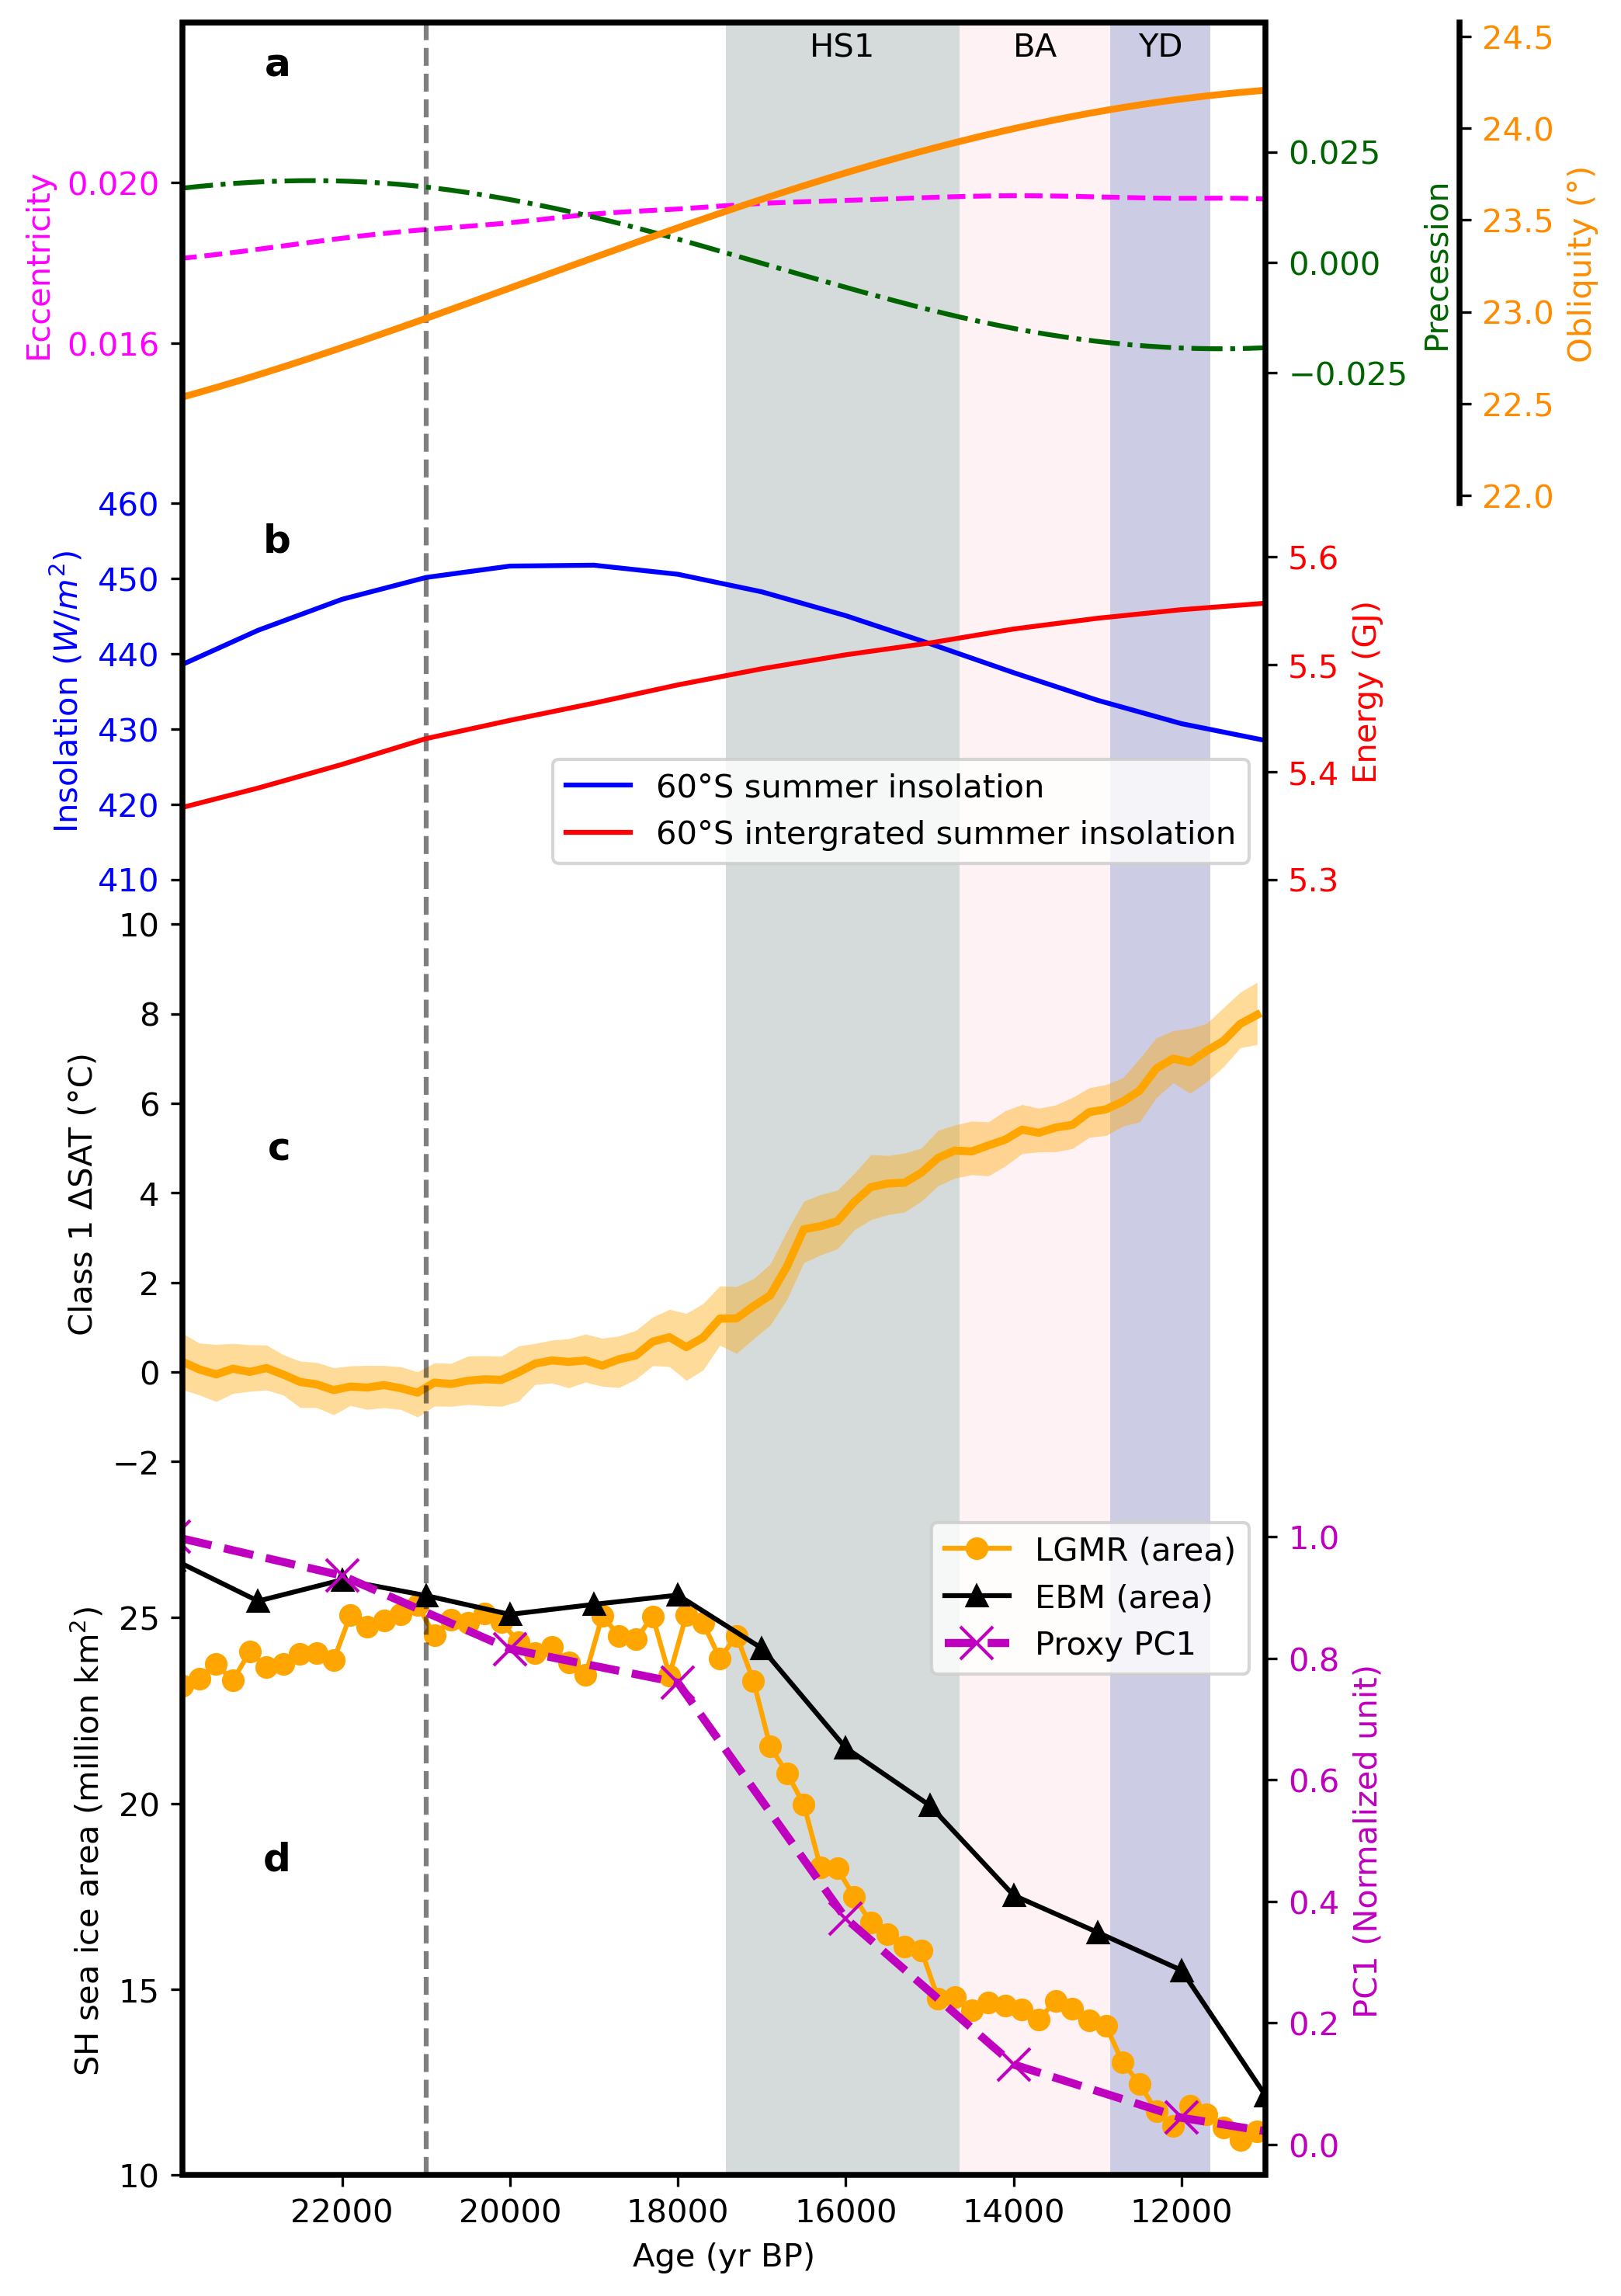

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
from scipy.stats import zscore



# Periods for the vertical grey bars
HS1 = np.array([17480, 14692]) - 50  # convert to b1950
BA = np.array([14692, 12896]) - 50
YD = np.array([12896, 11703]) - 50

# Define the grey color with a transparency using RGBA tuple
grey_color = (0.8, 0.8, 0.8, 0.5)  # Grey color with 50% transparency.

# Function to add grey bars to the subplots
def add_grey_bars(ax):

    ax.axvspan(HS1[1], HS1[0], color='darkslategray', alpha=0.2, lw=0,zorder=-1)
    ax.axvspan(BA[1], BA[0], color='pink', alpha=0.2, lw=0,zorder=-1)
    ax.axvspan(YD[1], YD[0], color='navy', alpha=0.2, lw=0,zorder=-1)


sic_colors = {
    '0-60': 'brown',      
    '60-120': 'blue', 
    '120-180': 'blueviolet', 
    '180-240': 'green',  
    '240-300': 'olive',   
    '300-360': 'darkorange',    
}

EBM_marker=['o','^','s']
EBM_label=['EBM, obliquity only','EBM, orbital','EBM, precession only']
EBM_line=['-','--',':']


# fig, axs = plt.subplots(4, 1, figsize=(6, 10), dpi=600,sharex=True)
fig, axs = plt.subplots(4, 1, figsize=(6, 12), dpi=300, sharex=True, 
                        gridspec_kw={'height_ratios': [2.3, 1.8, 3, 3.2]})


# First subplot for orbital parameters with three y-axes
ax0 = axs[0]

# Plot Eccentricity
ax0.plot(df_ecc['age'], df_ecc['ecc'], color='magenta', label='Eccentricity', linestyle='--')
ax0.set_ylabel('Eccentricity', color='magenta')
# set y axis limit
ax0.set_ylim(0.012, 0.024)
# set y ticks
ax0.set_yticks([0.016, 0.02])
ax0.tick_params(axis='y', labelcolor='magenta')
ax0.spines['bottom'].set_visible(False)

ax0.text(x=np.mean(HS1), y=0.99 * np.max(ax0.get_ylim()), s='HS1', ha='center', va='top')
ax0.text(x=np.mean(BA), y=0.99 * np.max(ax0.get_ylim()), s='BA', ha='center', va='top')
ax0.text(x=np.mean(YD), y=0.99 * np.max(ax0.get_ylim()), s='YD', ha='center', va='top')

# Create first twin axis for Precession
ax0_1 = ax0.twinx()
ax0_1.plot(df_pre['age'], df_pre['pre'], color='darkgreen', label='Precession', linestyle='-.')
ax0_1.set_ylabel('Precession', color='darkgreen')
ax0_1.tick_params(axis='y', labelcolor='darkgreen')
# set ytick label to be '-0.025', '0', and '0.025'
ax0_1.set_yticks([-0.025, 0, 0.025])
# show y axis and ticks on the right
ax0_1.yaxis.tick_right()
ax0_1.yaxis.set_label_position("right")
ax0_1.spines['bottom'].set_visible(False)

# Create second twin axis for Obliquity, positioned on the right
# plot obl data in dark blue
ax0_2 = ax0.twinx()
ax0_2.plot(df_obl['age'], df_obl['obl'].values*180/np.pi, color='darkorange', label='Obliquity',linewidth=2.1)
ax0_2.set_ylabel('Obliquity (°)', color='darkorange')
ax0_2.tick_params(axis='y', labelcolor='darkorange')
# set the line width of the y axis to 1.8
ax0_2.spines['right'].set_linewidth(1.8)

# Adjust the position of the second twin axis
ax0_2.spines['right'].set_position(('outward', 60))  # Offset the right spine of ax0_2
ax0_2.spines['bottom'].set_visible(False)









ax1 = axs[1]

# ax1.plot(inso60s['age'], inso60s['insolation'], color='blue', label='inso60s insolation')
ax1.plot(df_full_orbital_EBM['age'], df_full_orbital_EBM['60S summer inso (21 Dec to 21 Feb)'], color='blue',label='60°S summer insolation')
ax1.plot(0,0, color='red', label='60°S intergrated summer insolation')
# set y axis limit
ax1.set_ylim(410, 460)
ax1.set_ylabel('Insolation ($W/m^2$)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='lower right')

ax2 = ax1.twinx()
ax2.plot(df_inter_ann['age'], df_inter_ann['275'], color='red', label='df_inter_ann data')

# set y axis limit
ax2.set_ylim(5.3, 5.65)
ax2.set_ylabel('Energy (GJ)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
# set x axis limit
ax1.set_xlim(23900,11000)

# remove box
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
# remove xticks
# ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)





# # Second subplot
# # sample the value of weighted_avg_sat_mean at age most close to 21 ka
# weighted_avg_sat_mean_21=weighted_avg_sat_mean.sel(age=21000, method='nearest')
# # loop through weighted_avg_sat_ens and plot 
# # for i in range(len(weighted_avg_sat_ens)):
# #     axs[2].plot(ds_sat['age'], weighted_avg_sat_ens[i]-weighted_avg_sat_mean_21.values, color='orange', alpha=0.01)

# # calculate the 25% quantile of weighted_avg_sat_ens[i]-weighted_avg_sat_mean_21.values
# weighted_avg_sat_ens_25=np.quantile(weighted_avg_sat_ens, 0.25, axis=0)
# # calculate the 75% quantile of weighted_avg_sat_ens[i]-weighted_avg_sat_mean_21.values
# weighted_avg_sat_ens_75=np.quantile(weighted_avg_sat_ens, 0.75, axis=0)
# # fill between the 25% quantile and 75% quantile
# axs[2].fill_between(ds_sat['age'], weighted_avg_sat_ens_25-weighted_avg_sat_mean_21.values, weighted_avg_sat_ens_75-weighted_avg_sat_mean_21.values, color='orange', alpha=0.2)
# axs[2].plot(ds_sat['age'], weighted_avg_sat_mean-weighted_avg_sat_mean_21.values, color='orange', label='LGMR 50 to 70°S')


# calculate the 5th, 25th, 75th and 95th percentile of the weighted_avg_curves_k
# weighted_avg_curves_k_5th=np.percentile(weighted_avg_curves_k,5,axis=0)
weighted_avg_curves_k_25th=np.percentile(weighted_avg_curves_k,25,axis=0)
weighted_avg_curves_k_75th=np.percentile(weighted_avg_curves_k,75,axis=0)
# weighted_avg_curves_k_95th=np.percentile(weighted_avg_curves_k,95,axis=0)

# calculate the median of the weighted_avg_curves_k
weighted_avg_curves_k_median=np.median(weighted_avg_curves_k,axis=0)
axs[2].fill_between(time_of_class0,weighted_avg_curves_k_25th,weighted_avg_curves_k_75th,color='orange',alpha=0.4,linewidth=0)
axs[2].plot(time_of_class0, weighted_avg_curves_k_median, color='orange',linewidth=2.5)




# axs[2].legend(loc='upper left')
axs[2].set_ylabel('Class 1 ΔSAT (°C)')
axs[2].set_xlim(23900,11000)
axs[2].set_ylim(-3, 11)
# set y axis limit
# axs[1].set_ylim(-12, 3)
# remove boxes
axs[2].spines['top'].set_visible(False)
axs[2].spines['bottom'].set_visible(False)
axs[2].spines['right'].set_visible(False)
# remove xticks
axs[2].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)






# Plot the sea ice area

axs[3].plot(LGMR_sic_area[:,0], LGMR_sic_area[:,1], color='orange', label='LGMR (area)', marker='o')

axs[3].plot(df_all_forcing_EBM['age'], df_all_forcing_EBM['iceA (SH)'].values, color='k',linestyle='-',marker='^',label='EBM (area)')
axs[3].plot(0,0,color='m', marker='x',markersize=10, linewidth=2.5,linestyle='--',label='Proxy PC1')
# set y ticks color
# axs[3].tick_params(axis='y', labelcolor='steelblue')
# Add x and y labels
# set y axis limit
axs[3].set_ylim(10, 28)
# set y tick labels
axs[3].set_yticks([10, 15, 20, 25])
axs[3].set_xlabel('Age (yr BP)')  # corrected from axs[3].xlabel
# axs[3].set_ylabel('LGMR SIC (fraction)', color='steelblue')  # corrected from axs[3].ylabel
axs[3].set_ylabel('SH sea ice area (million km$^2$)')
axs[3].legend(loc='upper right')


# # Add the error range as shaded area
# axs[3].fill_between(ds_seaice['age'], 
#                     mean_sic_curve - std_sic_curve, 
#                     mean_sic_curve + std_sic_curve, 
#                     color='steelblue', alpha=0.2)

def min_max_scaling(array):
    min_val = np.min(array)
    max_val = np.max(array)
    scaled_array = (array - min_val) / (max_val - min_val)
    return scaled_array

# get the df_proxy_seaice_pc data younger than 30 ka
df_proxy_seaice_pc_younger=df_proxy_seaice_pc[df_proxy_seaice_pc['Age (ka)']<30]


# # Add a twin x-axis to plot the PC1
ax3_2 = axs[3].twinx()

ax3_2.plot(df_proxy_seaice_pc_younger['Age (ka)']*1000, min_max_scaling(df_proxy_seaice_pc_younger['PC 1'].values), color='m', marker='x',markersize=10, linewidth=2.5,linestyle='--',label='Proxy')
ax3_2.set_ylabel('PC1 (Normalized unit)', color='m')
ax3_2.tick_params(axis='y', labelcolor='m')
ax3_2.spines['top'].set_visible(False)
ax3_2.spines['bottom'].set_visible(False)


# remove boxes
axs[3].spines['top'].set_visible(False)
axs[3].spines['right'].set_visible(False)  
axs[3].spines['bottom'].set_visible(False)
axs[3].spines['left'].set_visible(False)

# remove xticks
axs[3].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)




# ax_robinson = fig.add_axes([0.57, 0.2, 0.3, 0.3], projection=ccrs.Robinson())
# # Adjusted function to add colored bands according to proxy data sectors
# def add_colored_bands(ax):
#     extent = [-180, 180, -70, -40]  # Set the extent to cover the relevant latitudes
#     ax.set_extent(extent, crs=ccrs.PlateCarree())

#     # Define the longitudinal extents for each sector
#     sector_extents = {
#         'Scotia Sea': (-60, -30),
#         'Central Atlantic': (-30, 0),
#         'East Atlantic': (0, 30),
#         'West Indian': (30, 60),
#         'Pacific': (150, -105 + 360)  # Adjusting for the 0-360 longitude system
#     }

#     # Draw filled polygons for each sector
#     for sector, (start_lon, end_lon) in sector_extents.items():
#         width = end_lon - start_lon
#         ax.add_patch(patches.Rectangle(
#             (start_lon, -70), width, 30, 
#             transform=ccrs.PlateCarree(),
#             color='navy',
#             alpha=1  # Adjust transparency as needed
#         ))

# # Call the function to add colored bands to the map
# add_colored_bands(ax_robinson)
# ax_robinson.coastlines()
# ax_robinson.set_global()




# Label for subplots
axs[0].text(0.1, 0.95, 'a', transform=axs[0].transAxes, fontsize=12, fontweight='bold', va='top', ha='right')
axs[1].text(0.1, 0.95, 'b', transform=axs[1].transAxes, fontsize=12, fontweight='bold', va='top', ha='right')
axs[2].text(0.1, 0.6, 'c', transform=axs[2].transAxes, fontsize=12, fontweight='bold', va='top', ha='right')
axs[3].text(0.1, 0.5, 'd', transform=axs[3].transAxes, fontsize=12, fontweight='bold', va='top', ha='right')
# axs[4].text(0.1, 0.5, 'e', transform=axs[4].transAxes, fontsize=12, fontweight='bold', va='top', ha='right')


# Get the coordinates for the axes
top = axs[0].get_position().y1
bottom = axs[-1].get_position().y0
left = axs[0].get_position().x0  # Assuming the left y-axis is used
right = axs[0].get_position().x1  # Assuming the right y-axis is not extended

# Create a box that connects all y-axes and the top of the first subplot, and the bottom of the last subplot
# The coordinates are adjusted so that the left and right sides of the box align with the y-axis line
box = patches.FancyBboxPatch(
    (left, bottom), right-left, top-bottom,
    transform=fig.transFigure, boxstyle="square,pad=0", 
    ec="black", fc="none", lw=1.8, clip_on=False
)

# Add the box to the figure
fig.patches.extend([box])

for ax in axs:
    add_grey_bars(ax)
    ax.axvline(x=21000, color='k', linestyle='--', alpha=0.5)


# adjust vertical space between subplots
fig.subplots_adjust(hspace=0)



# Show plot
plt.show()





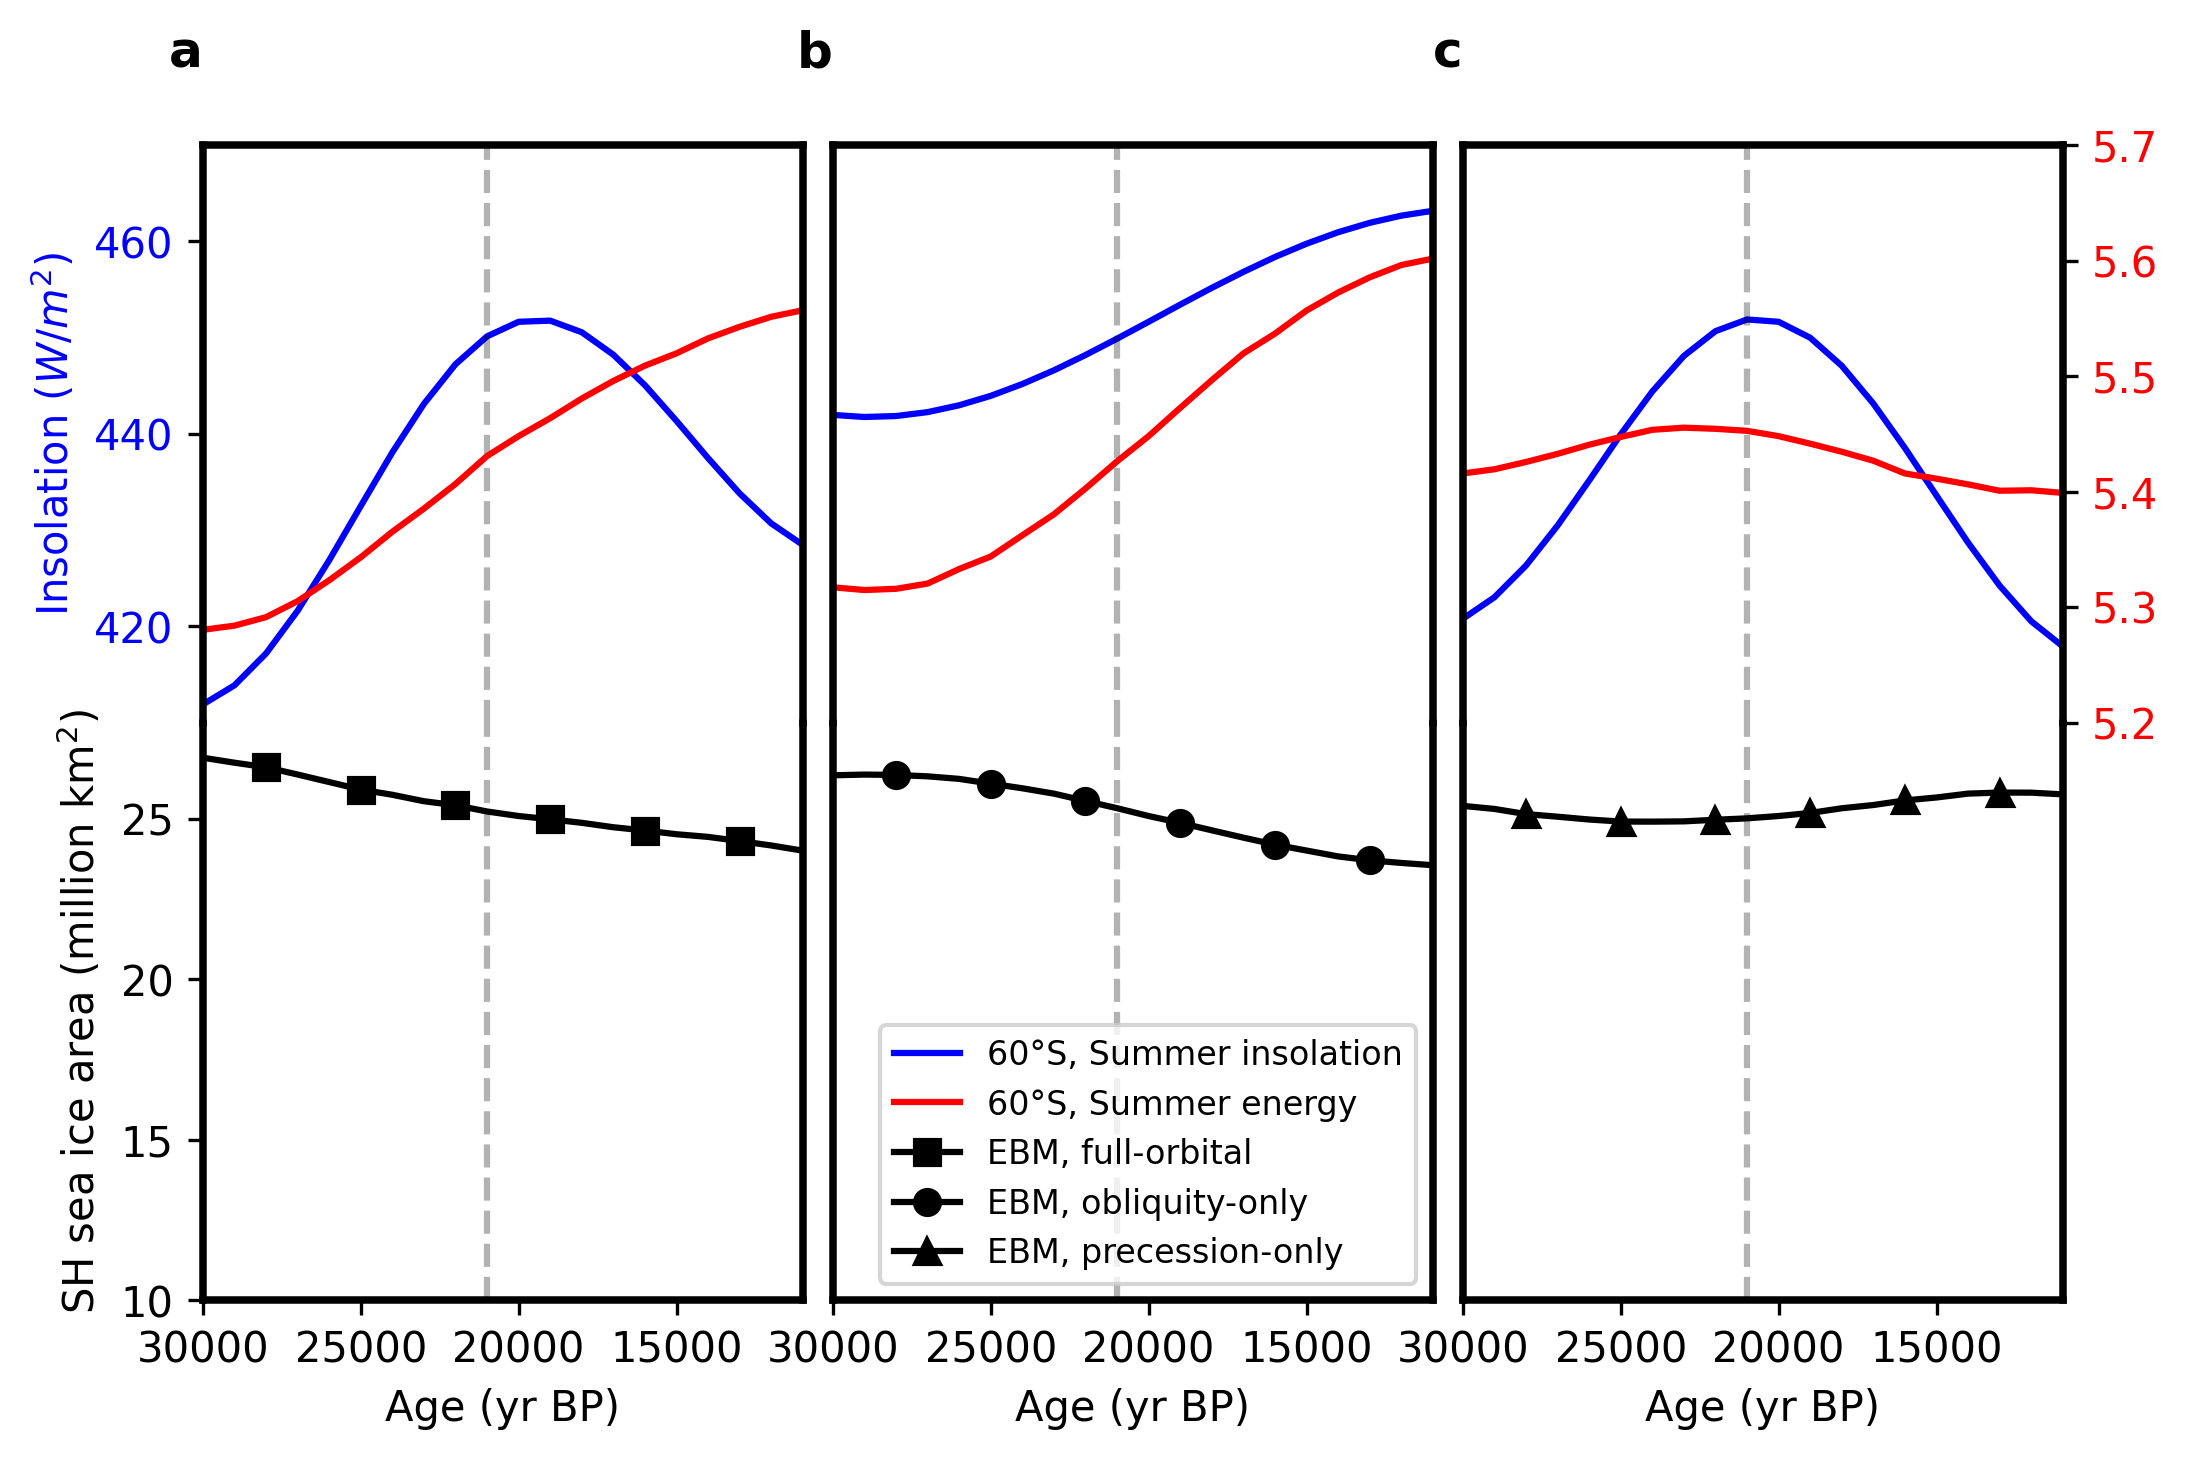

In [8]:
import matplotlib.pyplot as plt


ebm_list=[df_full_orbital_EBM, df_obl_EBM, df_pre_EBM]

# create a figure with 2 by 2 subplots
fig, axs = plt.subplots(2, 3, figsize=(8, 5), dpi=300)
fig.subplots_adjust(hspace=0, wspace=0.05)  # Increase wspace for horizontal spacing, set hspace=0 for no vertical spacing

EBM_labels=['EBM, full-orbital','EBM, obliquity-only', 'EBM, precession-only']
EBM_markers=['s','o','^']
for i in range (3):
    ax=axs[0,i]
    ax.plot(ebm_list[i]['age'], ebm_list[i]['60S summer inso (21 Dec to 21 Feb)'], color='b',  label='Summer insolation, obliquity forcing')
    ax.set_ylim(410, 470)  # Corrected line
    ax.tick_params(axis='y', labelcolor='b')
    # ax.plot(0,0,color='r', label='Summer energy, obliquity foring',)
    # ax.plot(0,0,color='k',label='Sea ice area,obl',marker='^',markevery=3) 
    # ax.legend(loc='lower right')

    ax2 = ax.twinx()
    ax2.plot(ebm_list[i]['age'], ebm_list[i]['Inter_summer_inso'],color='r')
    ax2.set_ylim(5.2, 5.7)  # Corrected line
    # turn off the y tick labels
    ax2.tick_params(axis='y', labelcolor='r')
    ax2.spines['bottom'].set_visible(False)
    # set the line width of the top spine to 1.8
    ax2.spines['top'].set_linewidth(1.8)
    ax2.spines['left'].set_linewidth(1.8)
    ax2.spines['right'].set_linewidth(1.8)
    # ax2.tick_params(axis='y', labelcolor='orange')
    # plot a vertical line at 21 ka
    ax.axvline(x=21000, color='k', linestyle='--',alpha=0.3)
    # # invert x axis
    if i==0:
        ax2.set_yticklabels([])
        ax2.set_yticks([])
        ax.set_ylabel('Insolation ($W/m^2$)', color='b')
        ax.set_yticks([420, 440, 460])
    if i==1:
        ax.set_yticklabels([])
        ax.set_yticks([])
        ax2.set_ylabel('Energy (GJ)', color='r')

        ax2.set_yticklabels([])
        ax2.set_yticks([])
        ax2.set_ylabel('')
    if i==2:
        ax.set_yticklabels([])
        ax.set_yticks([])


    ax=axs[1,i]
    ax.plot(0,0, color='b',  label='60°S, Summer insolation')
    ax.plot(0,0, color='r', label='60°S, Summer energy')
    ax.plot(0,0,color='k',marker=EBM_markers[0],markevery=3,label=EBM_labels[0]) #  
  
    ax.plot(ebm_list[i]['age'], ebm_list[i]['iceA (SH)'].values,color='k',marker=EBM_markers[i],markevery=3,label=EBM_labels[i]) # 
    ax.plot(0,0,color='k',marker=EBM_markers[2],markevery=3,label=EBM_labels[2]) #   
    ax.axvline(x=21000, color='k', linestyle='--',alpha=0.3)
    # set y axis limit
    ax.set_ylim(10, 28)
    # set y tick labels
    ax.set_yticks([10, 15, 20, 25])
    ax.set_xlabel('Age (yr BP)')



    if i==0:
        ax.set_ylabel('SH sea ice area (million km$^2$)')
    if i==1:
        ax.set_yticklabels([])
        # turn off y ticks
        ax.set_yticks([])
        ax.legend(loc='lower right',fontsize=8)
    if i==2:
        ax.set_yticklabels([])
        ax.set_yticks([])

axs[0,0].text(0, 1.2, 'a', transform=axs[0,0].transAxes, fontsize=12, fontweight='bold', va='top', ha='right')
axs[0,1].text(0, 1.2, 'b', transform=axs[0,1].transAxes, fontsize=12, fontweight='bold', va='top', ha='right')
axs[0,2].text(0, 1.2, 'c', transform=axs[0,2].transAxes, fontsize=12, fontweight='bold', va='top', ha='right')
for ax in axs[0, :]:
    ax.set_xlim(30000,11000)
    # turn off the xticklabels
    ax.set_xticklabels([])
    # ax.invert_xaxis()
    ax.spines['bottom'].set_visible(False)
for ax in axs[1, :]:
    ax.set_xlim(30000,11000)
    # ax.invert_xaxis()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_linewidth(1.8)
    ax.spines['left'].set_linewidth(1.8)
    ax.spines['bottom'].set_linewidth(1.8)






# Analysis of the early warming

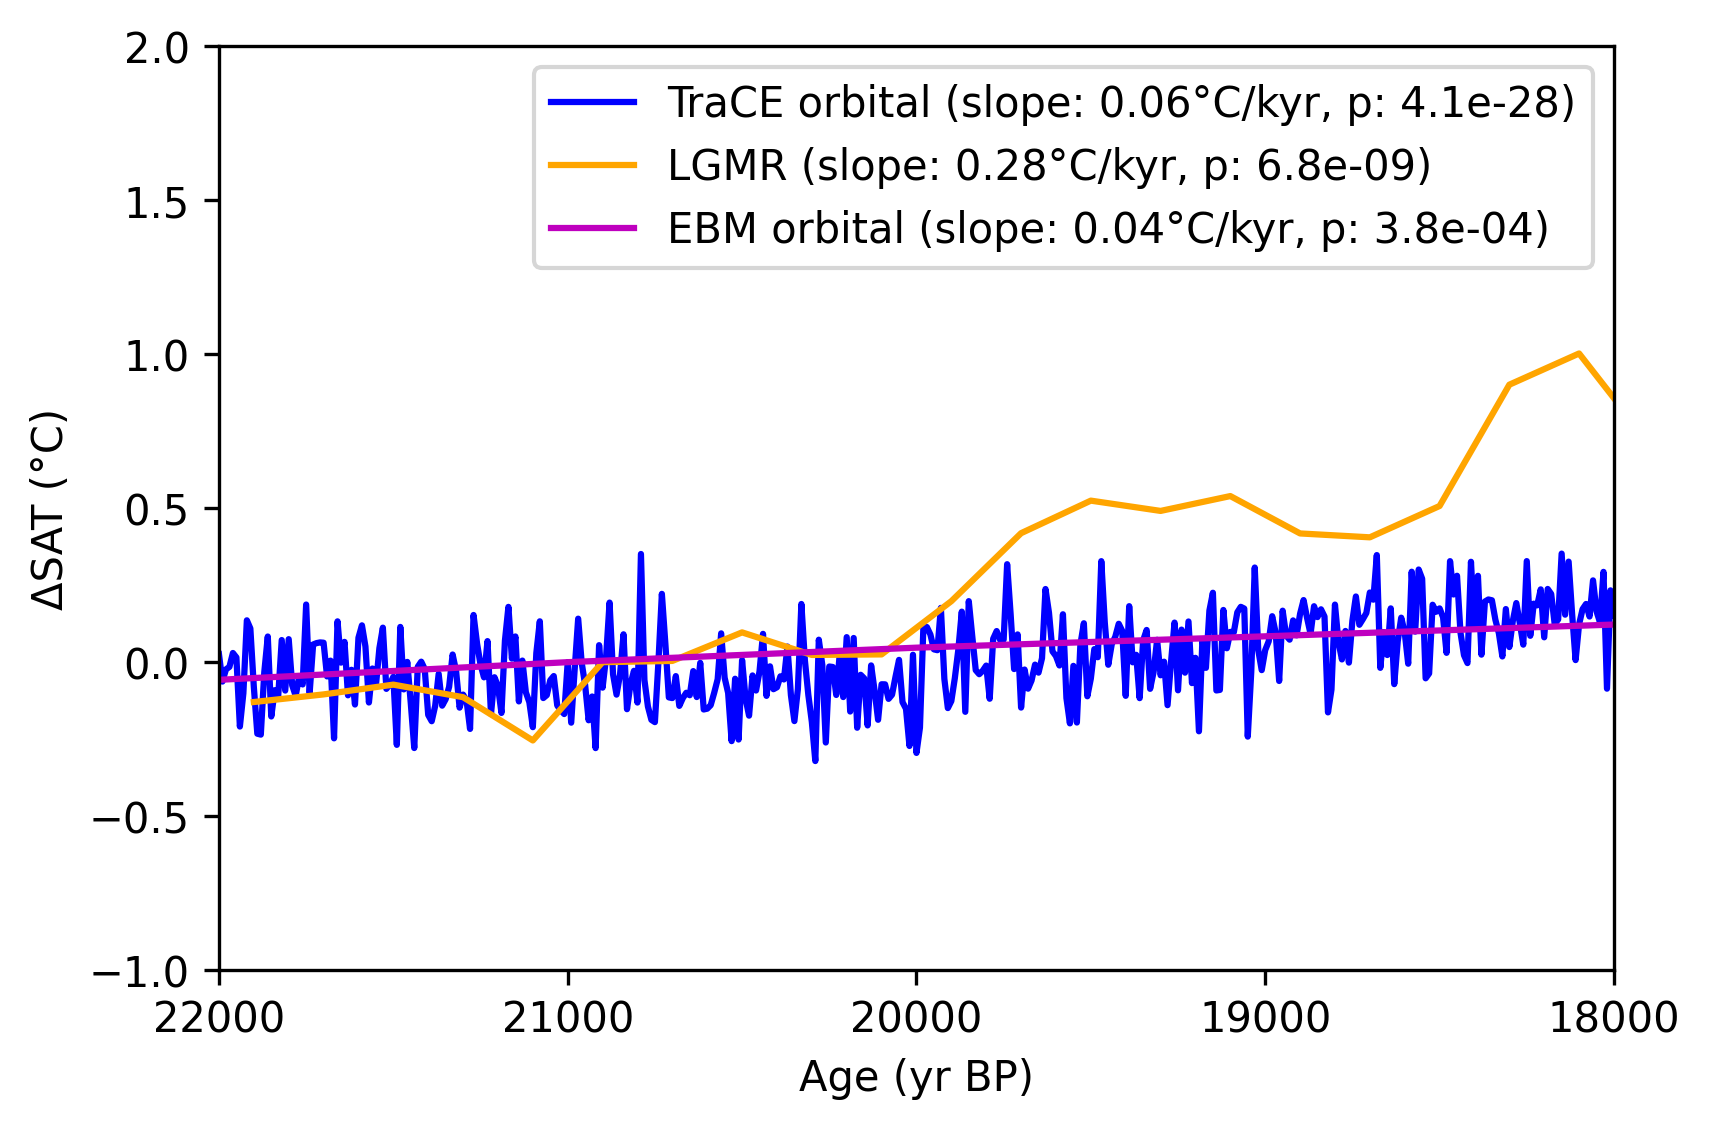

lgmrp 6.8276788067184835e-09


In [27]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from matplotlib.patches import Rectangle

# Convert xarray DataArray to NumPy array
ds_sat_age_np = ds_sat['age'].values
weighted_avg_sat_mean_np = weighted_avg_sat_mean.values

# Filter the age range for ds_sat and calculate delta SAT
lgmr_age_mask = (ds_sat_age_np >= 11000) & (ds_sat_age_np <= 22000)
lgmr_value_at_21kyr = weighted_avg_sat_mean_np[np.abs(ds_sat_age_np - 21000).argmin()]
lgmr_delta_sat = weighted_avg_sat_mean_np[lgmr_age_mask] - lgmr_value_at_21kyr

# Filter the age range for trace_age and calculate delta SAT
trace_age_mask = (trace_age >= 11000) & (trace_age <= 22000)
trace_value_at_21kyr = sat_series_orb[np.abs(trace_age - 21000).argmin()]
trace_delta_sat = sat_series_orb[trace_age_mask] - trace_value_at_21kyr

# Convert pandas DataFrame to NumPy array
df_full_orbital_EBM_age_np = df_full_orbital_EBM['age'].values
df_full_orbital_EBM_sat_np = df_full_orbital_EBM['SAT (50 to 70S)'].values

# Filter the age range for df_full_orbital_EBM and calculate delta SAT
ebm_age_mask = (df_full_orbital_EBM_age_np >= 11000) & (df_full_orbital_EBM_age_np <= 22000)
ebm_value_at_21kyr = df_full_orbital_EBM_sat_np[df_full_orbital_EBM_age_np == 21000][0]
ebm_delta_sat = df_full_orbital_EBM_sat_np[ebm_age_mask] - ebm_value_at_21kyr

# Define a function to perform linear regression and return slope and p-value
def fit_slope_and_p_value(x, y):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    return slope, p_value

# Create a figure
fig, ax = plt.subplots(figsize=(6, 4), dpi=300)

# Regression analysis
lgmr_regression_age_mask = (ds_sat_age_np >= 18000) & (ds_sat_age_np <= 22000)
trace_regression_age_mask = (trace_age >= 18000) & (trace_age <= 22000)
ebm_regression_age_mask = (df_full_orbital_EBM_age_np >= 18000) & (df_full_orbital_EBM_age_np <= 22000)

lgmr_slope, lgmr_p = fit_slope_and_p_value(ds_sat_age_np[lgmr_regression_age_mask], weighted_avg_sat_mean_np[lgmr_regression_age_mask])
trace_slope, trace_p = fit_slope_and_p_value(trace_age[trace_regression_age_mask], sat_series_orb[trace_regression_age_mask])
ebm_slope, ebm_p = fit_slope_and_p_value(df_full_orbital_EBM_age_np[ebm_regression_age_mask], df_full_orbital_EBM_sat_np[ebm_regression_age_mask])

# Format the legend with two significant digits and slope in °C/kyr
format_legend = lambda slope, p: f'slope: {-slope*1000:.2f}°C/kyr, p: {p:.1e}'

# Plot the ΔSAT data with formatted legend
ax.plot(trace_age[trace_age_mask], trace_delta_sat, color='blue', label=f'TraCE orbital ({format_legend(trace_slope, trace_p)})')
ax.plot(ds_sat_age_np[lgmr_age_mask], lgmr_delta_sat, color='orange', label=f'LGMR ({format_legend(lgmr_slope, lgmr_p)})')
ax.plot(df_full_orbital_EBM_age_np[ebm_age_mask], ebm_delta_sat, color='m', label=f'EBM orbital ({format_legend(ebm_slope, ebm_p)})')

# Plot a rectangle covering the area between x=18000 and x=11000
# Change color and alpha value for visibility
rect_color = 'w'  # A light grey color
rect_alpha = 0.7  # Semi-transparent
rect = Rectangle((11000, ax.get_ylim()[0]), 7000, ax.get_ylim()[1] - ax.get_ylim()[0], color=rect_color, alpha=rect_alpha, linewidth=0,zorder=4)
ax.add_patch(rect)

# set x limit
ax.set_xlim(18000,22000)
# set y limit
ax.set_ylim(-1, 2)
# set x tick label
ax.set_xticks([18000, 19000, 20000, 21000, 22000])

# Invert x-axis
ax.invert_xaxis()

# Add labels and legend
ax.set_xlabel('Age (yr BP)')
ax.set_ylabel('ΔSAT (°C)')
ax.legend()

# Show the plot
plt.show()
print('lgmrp',lgmr_p)

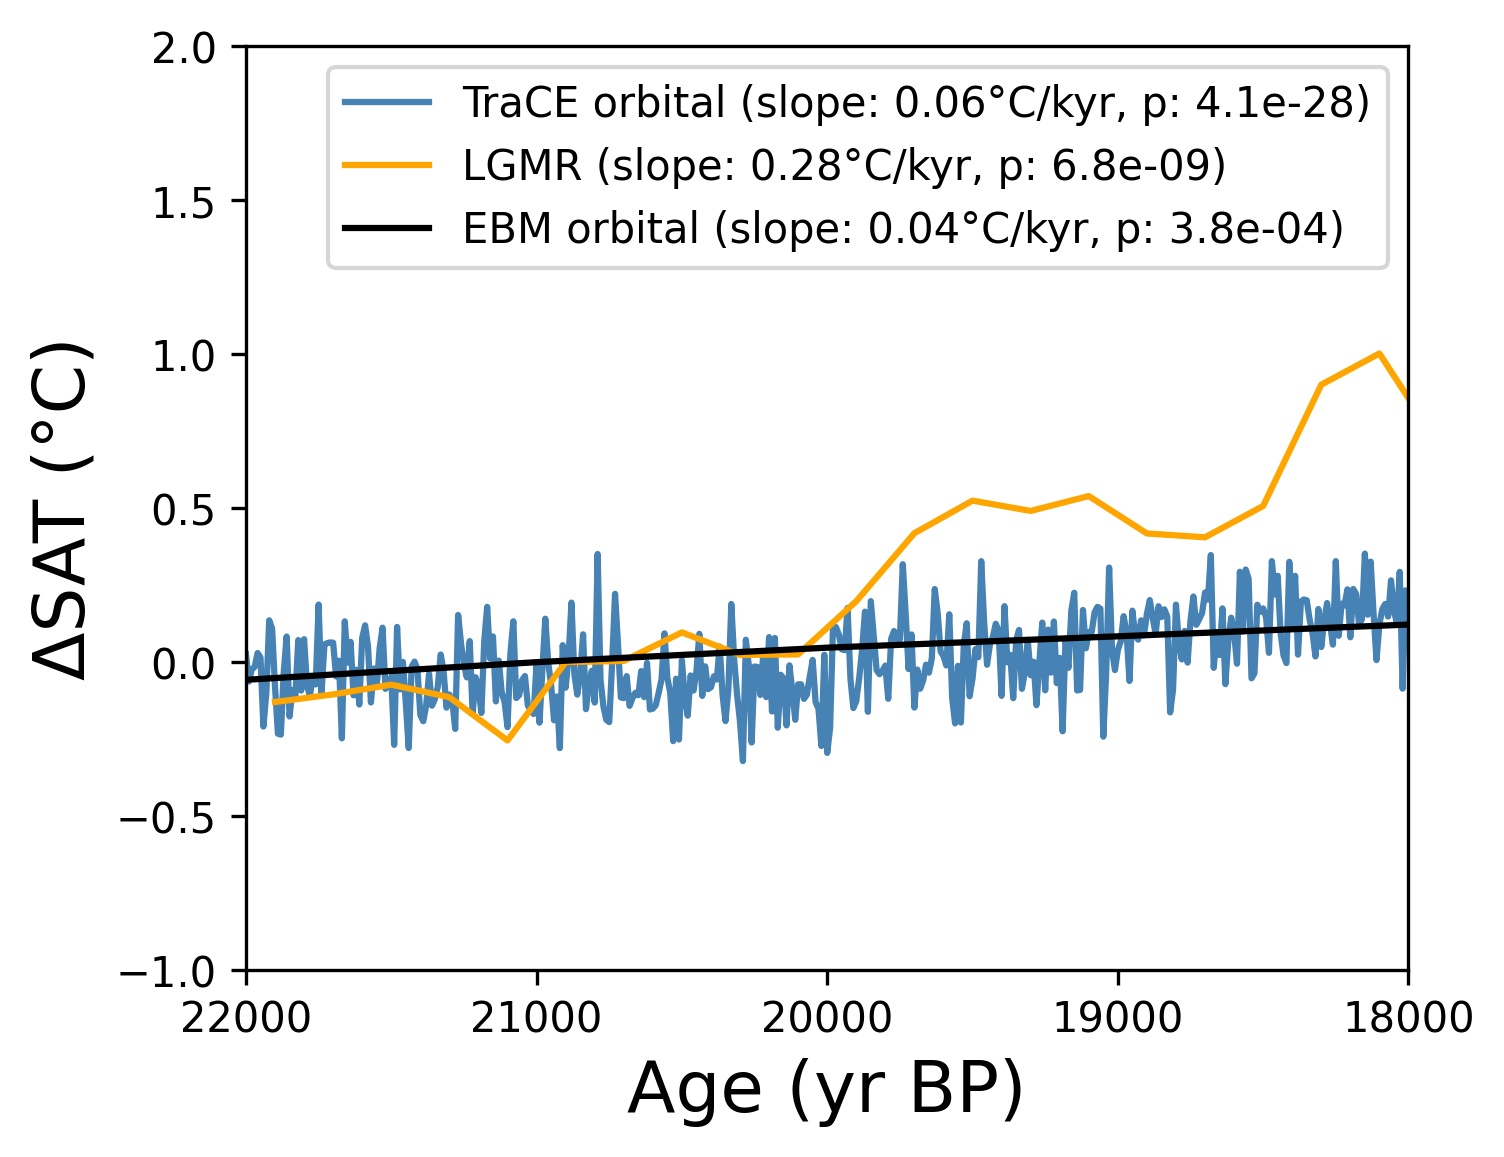

lgmrp 6.8276788067184835e-09


In [33]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from matplotlib.patches import Rectangle

# Convert xarray DataArray to NumPy array
ds_sat_age_np = ds_sat['age'].values
weighted_avg_sat_mean_np = weighted_avg_sat_mean.values

# Filter the age range for ds_sat and calculate delta SAT
lgmr_age_mask = (ds_sat_age_np >= 11000) & (ds_sat_age_np <= 22000)
lgmr_value_at_21kyr = weighted_avg_sat_mean_np[np.abs(ds_sat_age_np - 21000).argmin()]
lgmr_delta_sat = weighted_avg_sat_mean_np[lgmr_age_mask] - lgmr_value_at_21kyr

# Filter the age range for trace_age and calculate delta SAT
trace_age_mask = (trace_age >= 11000) & (trace_age <= 22000)
trace_value_at_21kyr = sat_series_orb[np.abs(trace_age - 21000).argmin()]
trace_delta_sat = sat_series_orb[trace_age_mask] - trace_value_at_21kyr

# Convert pandas DataFrame to NumPy array
df_full_orbital_EBM_age_np = df_full_orbital_EBM['age'].values
df_full_orbital_EBM_sat_np = df_full_orbital_EBM['SAT (50 to 70S)'].values

# Filter the age range for df_full_orbital_EBM and calculate delta SAT
ebm_age_mask = (df_full_orbital_EBM_age_np >= 11000) & (df_full_orbital_EBM_age_np <= 22000)
ebm_value_at_21kyr = df_full_orbital_EBM_sat_np[df_full_orbital_EBM_age_np == 21000][0]
ebm_delta_sat = df_full_orbital_EBM_sat_np[ebm_age_mask] - ebm_value_at_21kyr

# Define a function to perform linear regression and return slope and p-value
def fit_slope_and_p_value(x, y):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    return slope, p_value

# Create a figure
fig, ax = plt.subplots(figsize=(5, 4), dpi=300)

# Regression analysis
lgmr_regression_age_mask = (ds_sat_age_np >= 18000) & (ds_sat_age_np <= 22000)
trace_regression_age_mask = (trace_age >= 18000) & (trace_age <= 22000)
ebm_regression_age_mask = (df_full_orbital_EBM_age_np >= 18000) & (df_full_orbital_EBM_age_np <= 22000)

lgmr_slope, lgmr_p = fit_slope_and_p_value(ds_sat_age_np[lgmr_regression_age_mask], weighted_avg_sat_mean_np[lgmr_regression_age_mask])
trace_slope, trace_p = fit_slope_and_p_value(trace_age[trace_regression_age_mask], sat_series_orb[trace_regression_age_mask])
ebm_slope, ebm_p = fit_slope_and_p_value(df_full_orbital_EBM_age_np[ebm_regression_age_mask], df_full_orbital_EBM_sat_np[ebm_regression_age_mask])

# Format the legend with two significant digits and slope in °C/kyr
format_legend = lambda slope, p: f'slope: {-slope*1000:.2f}°C/kyr, p: {p:.1e}'

# Plot the ΔSAT data with formatted legend
ax.plot(trace_age[trace_age_mask], trace_delta_sat, color='steelblue', label=f'TraCE orbital ({format_legend(trace_slope, trace_p)})')
ax.plot(ds_sat_age_np[lgmr_age_mask], lgmr_delta_sat, color='orange', label=f'LGMR ({format_legend(lgmr_slope, lgmr_p)})')
ax.plot(df_full_orbital_EBM_age_np[ebm_age_mask], ebm_delta_sat, color='k', label=f'EBM orbital ({format_legend(ebm_slope, ebm_p)})')

# Plot a rectangle covering the area between x=18000 and x=11000
# Change color and alpha value for visibility
rect_color = 'w'  # A light grey color
rect_alpha = 0.7  # Semi-transparent
rect = Rectangle((11000, ax.get_ylim()[0]), 7000, ax.get_ylim()[1] - ax.get_ylim()[0], color=rect_color, alpha=rect_alpha, linewidth=0,zorder=4)
ax.add_patch(rect)

# set x limit
ax.set_xlim(18000,22000)
# set y limit
ax.set_ylim(-1, 2)
# set x tick label
ax.set_xticks([18000, 19000, 20000, 21000, 22000])

# Invert x-axis
ax.invert_xaxis()

# Add labels and legend
ax.set_xlabel('Age (yr BP)',fontsize=17)
ax.set_ylabel('ΔSAT (°C)',fontsize=17)
ax.legend()

# Show the plot
plt.show()
print('lgmrp',lgmr_p)

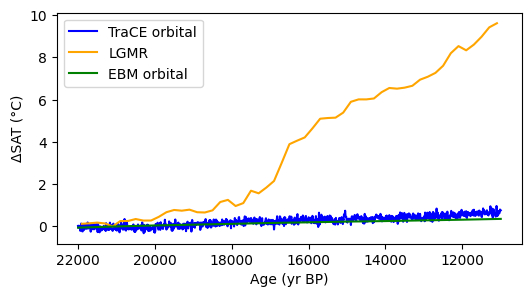

In [106]:
import matplotlib.pyplot as plt
import numpy as np

# Filter the age range for ds_sat and calculate delta SAT
age_mask = (ds_sat['age'] >= 11000) & (ds_sat['age'] <= 22000)
lgmr_value_at_21kyr = weighted_avg_sat_mean.sel(age=21000, method='nearest')
lgmr_delta_sat = weighted_avg_sat_mean[age_mask] - lgmr_value_at_21kyr

# Filter the age range for trace_age and calculate delta SAT
trace_mask = (trace_age >= 11000) & (trace_age <= 22000)
trace_value_at_21kyr = sat_series_orb[np.abs(trace_age - 21000).argmin()]
trace_delta_sat = sat_series_orb[trace_mask] - trace_value_at_21kyr

# Filter the age range for df_full_orbital_EBM and calculate delta SAT
ebm_mask = (df_full_orbital_EBM['age'] >= 11000) & (df_full_orbital_EBM['age'] <= 22000)
ebm_value_at_21kyr = df_full_orbital_EBM.loc[df_full_orbital_EBM['age'] == 21000, 'SAT (50 to 70S)'].iloc[0]
ebm_delta_sat = df_full_orbital_EBM.loc[ebm_mask, 'SAT (50 to 70S)'] - ebm_value_at_21kyr

# Create a figure
fig, ax = plt.subplots(figsize=(6, 3), dpi=100)

# Plot the delta SAT data
ax.plot(trace_age[trace_mask], trace_delta_sat, color='blue', label='TraCE orbital')
ax.plot(ds_sat['age'][age_mask], lgmr_delta_sat, color='orange', label='LGMR')
ax.plot(df_full_orbital_EBM['age'][ebm_mask], ebm_delta_sat, color='green', label='EBM orbital')


# invert x axis
ax.invert_xaxis()




# Add labels and legend
ax.set_xlabel('Age (yr BP)')
ax.set_ylabel('ΔSAT (°C)')
ax.legend()

# Show the plot
plt.show()


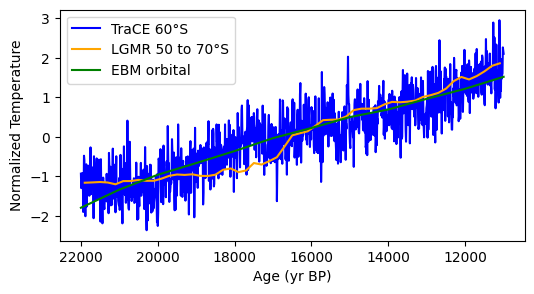

In [102]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

# Filter the age range for ds_sat and normalize
age_mask = (ds_sat['age'] >= 11000) & (ds_sat['age'] <= 22000)
lgmr_normalized = zscore(weighted_avg_sat_mean[age_mask])

# Filter the age range for trace_age and normalize
trace_mask = (trace_age >= 11000) & (trace_age <= 22000)
trace_normalized = zscore(sat_series_orb[trace_mask])

# Filter the age range for df_full_orbital_EBM and normalize
ebm_mask = (df_full_orbital_EBM['age'] >= 11000) & (df_full_orbital_EBM['age'] <= 22000)
ebm_normalized = zscore(df_full_orbital_EBM.loc[ebm_mask, 'SAT (50 to 70S)'].values)

# Create a figure
fig, ax = plt.subplots(figsize=(6, 3), dpi=100)

# Plot the normalized data
ax.plot(trace_age[trace_mask], trace_normalized, color='blue', label='TraCE orbital')
ax.plot(ds_sat['age'][age_mask], lgmr_normalized, color='orange', label='LGMR')

ax.plot(df_full_orbital_EBM['age'][ebm_mask], ebm_normalized, color='green', label='EBM orbital')
# invert x axis
ax.invert_xaxis()

# Add labels and legend
ax.set_xlabel('Age (yr BP)')
ax.set_ylabel('Normalized Temperature')
ax.legend()

# Show the plot
plt.show()


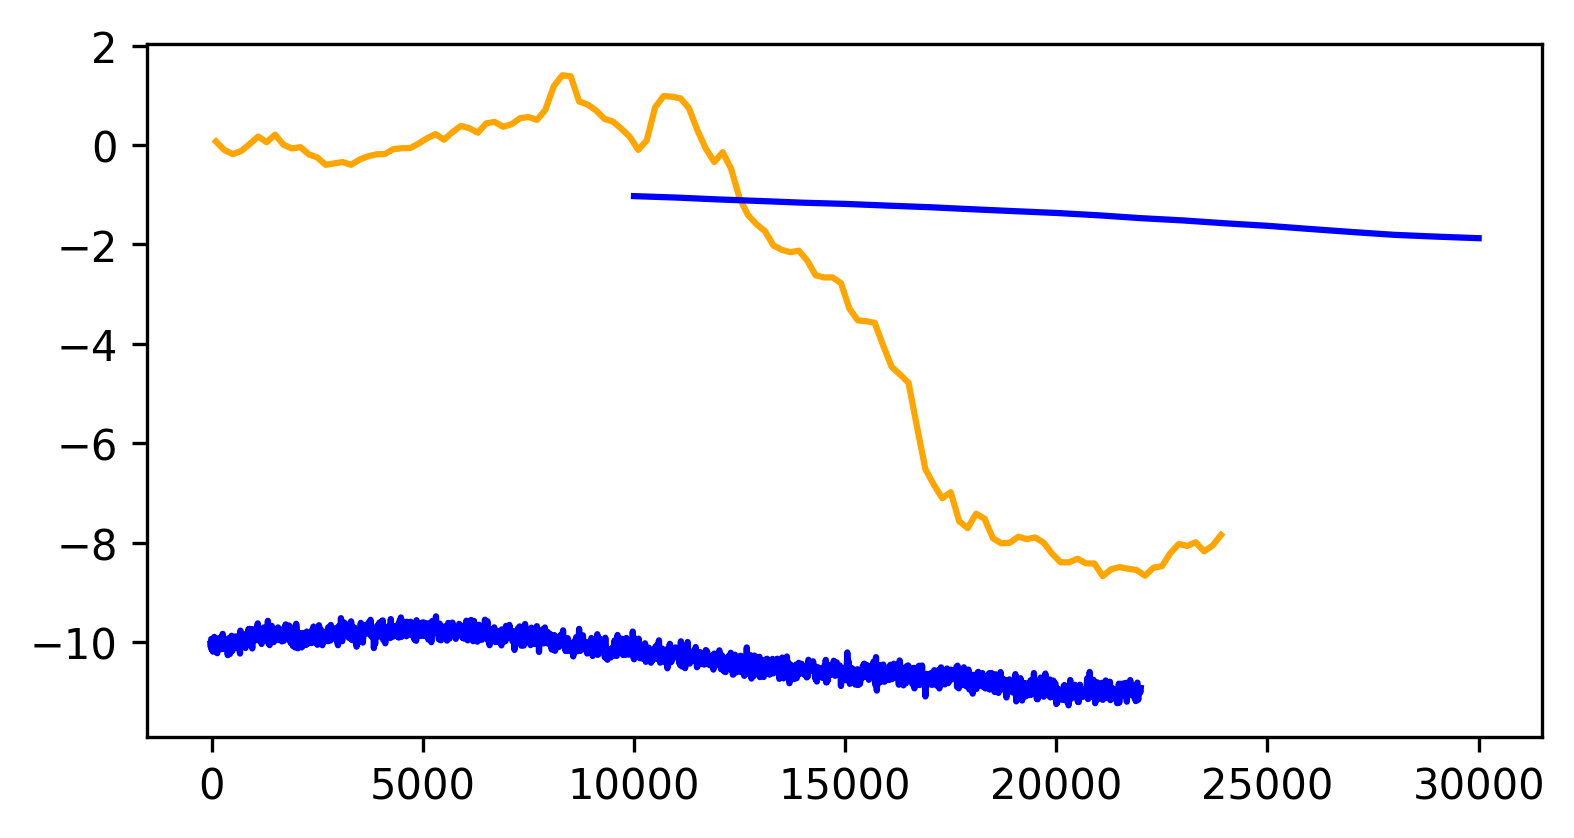

In [90]:
# create a figure
fig, ax = plt.subplots(figsize=(6, 3), dpi=300)
# plot the LGMR sat
ax.plot(ds_sat['age'], weighted_avg_sat_mean, color='orange', label='LGMR 50 to 70°S')
# plot the trace orb
ax.plot(trace_age, sat_series_orb, color='b', label='TraCE 60°S')
# plot the sat of EBM orbital
ax.plot(df_full_orbital_EBM['age'], df_full_orbital_EBM['SAT (50 to 70S)'], color='b', label='EBM orbital')



In [89]:
df_full_orbital_EBM

,age,60S summer inso (21 Dec to 21 Feb),Inter_summer_inso,SAT (50 to 70S),iceA (SH),ice_asy,summer_duration
0,10000,427.336750,5.564279,-1.029714,23.891422,NaN,NaN
1,11000,428.465963,5.557092,-1.058631,24.010389,NaN,NaN
2,12000,430.701655,5.551410,-1.096506,24.172172,NaN,NaN
3,13000,433.812557,5.542759,-1.128241,24.309235,NaN,NaN
4,14000,437.481913,5.532736,-1.161961,24.439776,NaN,NaN
5,15000,441.350301,5.519766,-1.186053,24.522544,NaN,NaN
6,16000,445.059065,5.509085,-1.220547,24.638237,NaN,NaN
7,17000,448.228688,5.495867,-1.252628,24.740796,NaN,NaN
8,18000,450.562811,5.480637,-1.293526,24.877860,NaN,NaN
9,19000,451.768596,5.463626,-1.331696,24.988860,NaN,NaN
